In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_rows = 999
%matplotlib inline

### Load Alex data set

In [2]:
df_alex = pd.read_excel('RBC and asexual Pf lipidome.xlsx', skiprows=1)

In [3]:
df_alex

,Unnamed: 0,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,Schizont 2,Schizont 3
0,CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,4.530000,6.440000
1,CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,0.000000,0.000000
2,CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,0.000000,0.000000
3,CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,0.000000,0.000000
4,CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,0.000000,0.000000
5,CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,0.000000,0.000000
6,CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,38.810000,43.800000
8,DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,11.020000,0.000000
9,DAG (34:1) 16:0_18:1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.240000,40.160000,138.650000,150.350000,83.360000


### Remove rows with only 'NaN' value

In [4]:
df_alex.dropna(axis = 0, how = 'all', inplace = True)
df_alex.reset_index(drop=True, inplace=True)

lst = df_alex.iloc[:,0]
index_classes = [0]

for i,x in enumerate(lst):
    if i == len(lst)-1:
        break
    if x[:2] != lst[i+1][:2]:
        index_classes.append(i+1)
        print(i, x)
# print(index_classes)

6 CE 20:5
11 DAG (36:2) 18:1_18:1
12 FreeChol
14 LPC 18:0
40 PC O-38:5
53 PE 40:6
59 PG (36:3) 18:1_18:2
66 PS 40:6
77 TAG 56:6
84 Cer 24:2
92 DHSM 25:0
117 SM 26:2
118 Cer
119 DHSM
120 SM
121 CE
122 DG
123 FC
124 PC
125 PE
126 PG
127 PS
128 TG
129 Neutral lipids
130 Phospholipids
131 Free cholesterol
132 Sphingolipids
133 total
137 % Sphingolipids
138 Phospholipids (total)
142 % PS
143 Neutral lipids (total)
146 % TAG
147 Sphingolipids (total)


In [5]:
df_alex.set_index('Unnamed: 0', inplace=True)
df_sns = df_alex.copy()

Calcuate mean and std. for each metabolite in each phase mean = mean(Ring1,Ring2,Ring3) 

in addtion produce dict with key = metaboliteID, value as nested list each entry for a phase = [[Ring_phase],[Tropho_Phase],[Schizont_Phase]]

In [6]:
# get each metabolite in every phase
dic = {}
nrow = 134
for i in range(4):
    phase = df_alex.columns[i*3][:-1]
    print(phase)
    data = df_alex.iloc[:,i*3:i*3+3].T
    df_alex['mean_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].mean(axis=1)
    df_alex['std_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].std(axis=1)
    df_alex['coeff_var'+phase] = df_alex['std_'+phase] / df_alex['mean_'+phase]
    for i,x in enumerate(data.columns):
        y = data[x]
        dic[x] = dic.get(x, [])
        if x in dic.keys():
            dic[x].append(data[x])
        

RBC
Ring 
Trophozoite 
Schizont 


In [7]:
df_alex

,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,...,coeff_varRBC,mean_Ring,std_Ring,coeff_varRing,mean_Trophozoite,std_Trophozoite,coeff_varTrophozoite,mean_Schizont,std_Schizont,coeff_varSchizont
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,...,0.093820,4.650000,1.859597,0.399913,7.906667,5.455138,0.689942,4.833333,1.478524,0.305902
CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,...,0.502317,1.063333,1.841747,1.732051,1.510000,2.615397,1.732051,0.000000,0.000000,NaN
CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,...,0.271761,4.063333,2.418043,0.595089,5.696667,9.866916,1.732051,0.000000,0.000000,NaN
CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,...,0.410901,11.713333,8.774197,0.749078,17.520000,30.345530,1.732051,0.000000,0.000000,NaN
CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,...,0.498542,1.416667,1.637814,1.156104,2.856667,4.947892,1.732051,0.000000,0.000000,NaN
CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,...,0.570003,1.486667,1.377582,0.926625,2.430000,4.208883,1.732051,0.000000,0.000000,NaN
CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.732051,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,...,NaN,0.000000,0.000000,NaN,27.795556,17.396181,0.625862,37.146667,7.622351,0.205196
DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,...,NaN,0.000000,0.000000,NaN,10.623333,9.687757,0.911932,11.190000,11.275961,1.007682


In [13]:
dic.keys()

dict_keys(['CE 16:0', 'CE 16:1', 'CE 18:1', 'CE 18:2', 'CE 18:3', 'CE 20:4', 'CE 20:5', 'DAG (32:0) 16:0_16:0', 'DAG (34:0) 16:0_18:0', 'DAG (34:1) 16:0_18:1', 'DAG (36:1) 18:0_18:1', 'DAG (36:2) 18:1_18:1', 'FreeChol', 'LPC 16:0', 'LPC 18:0', 'PC 32:0', 'PC 32:1', 'PC 34:0', 'PC 34:1', 'PC 34:2', 'PC 34:3', 'PC 36:0', 'PC 36:1', 'PC 36:2', 'PC 36:3', 'PC 36:4', 'PC 36:5', 'PC 38:3', 'PC 38:4', 'PC 38:5', 'PC 38:6', 'PC 38:7', 'PC 40:4', 'PC 40:5', 'PC 40:6', 'PC 40:7', 'PC O-32:0', 'PC O-34:1', 'PC O-36:2', 'PC O-38:4', 'PC O-38:5', 'PE 34:1', 'PE 34:2', 'PE 36:1', 'PE 36:2', 'PE 36:3', 'PE 36:4', 'PE 36:5', 'PE 38:3', 'PE 38:4', 'PE 38:5', 'PE 38:6', 'PE 40:5', 'PE 40:6', 'PG (34:1) 16:0_18:1', 'PG (34:2) 16:0_18:2', 'PG (36:1) 18:0_18:1', 'PG (36:2) 18:0_18:2', 'PG (36:2) 18:1_18:1', 'PG (36:3) 18:1_18:2', 'PS 34:1', 'PS 36:1', 'PS 36:2', 'PS 38:4', 'PS 38:5', 'PS 40:5', 'PS 40:6', 'TAG 48:0', 'TAG 50:0', 'TAG 50:1', 'TAG 50:2', 'TAG 52:1', 'TAG 52:2', 'TAG 52:3', 'TAG 54:2', 'TAG 5

Produce boxplots of every metabolite with box = values at specific phase, plus scatterplot of the values to see spreading

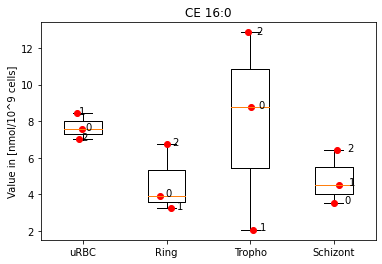

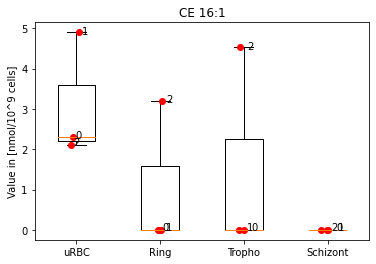

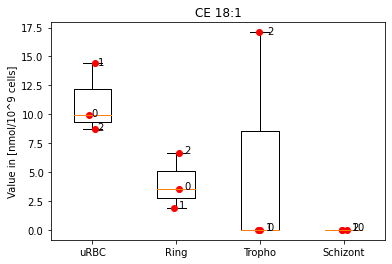

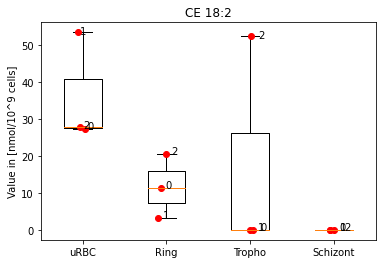

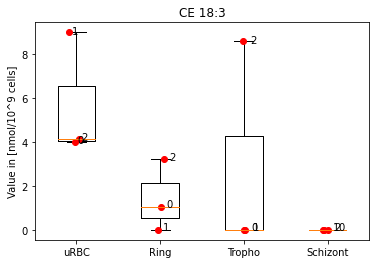

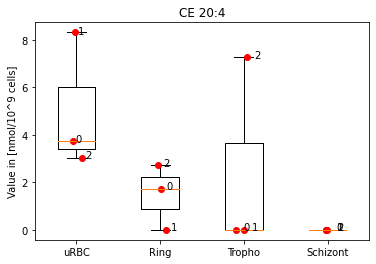

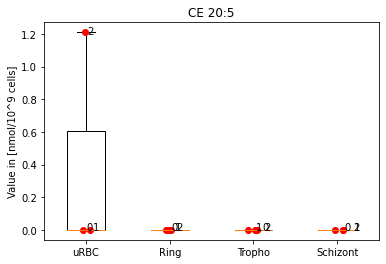

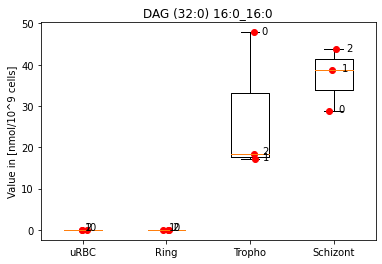

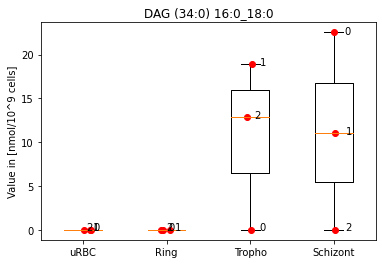

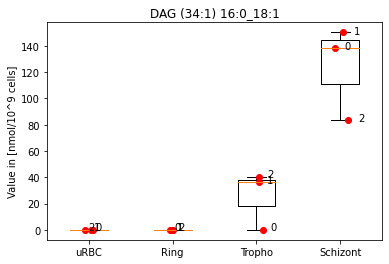

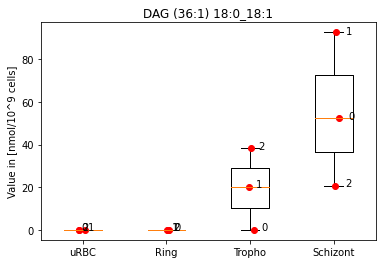

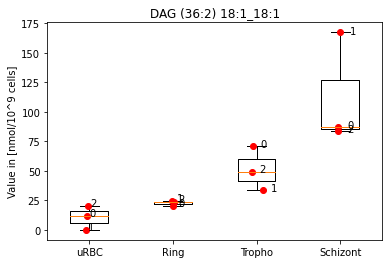

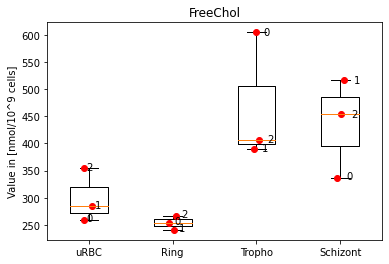

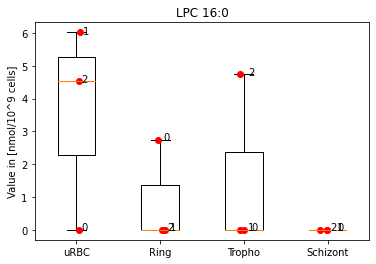

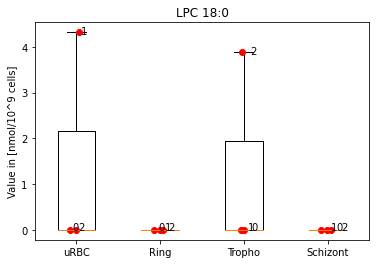

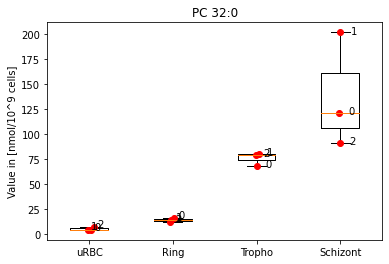

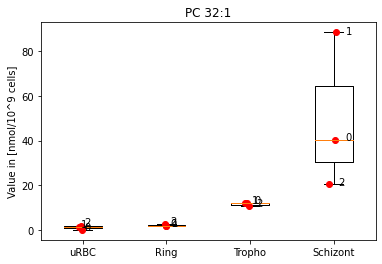

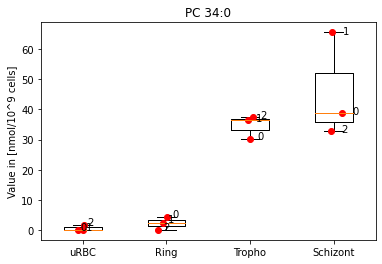

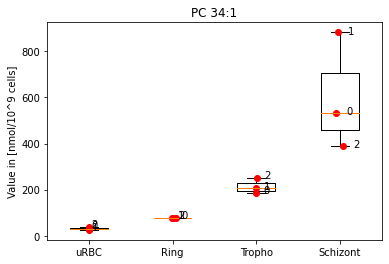

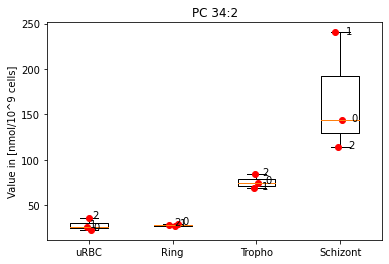

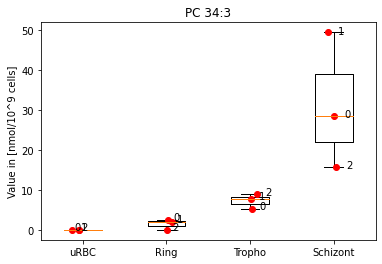

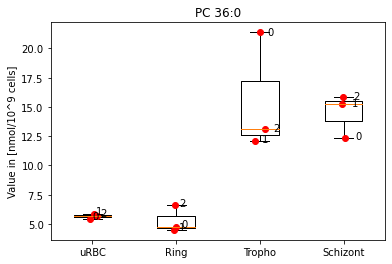

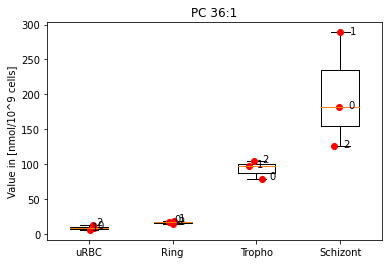

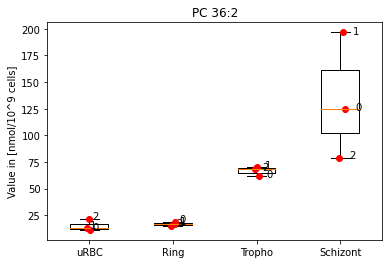

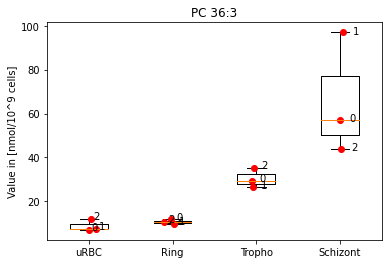

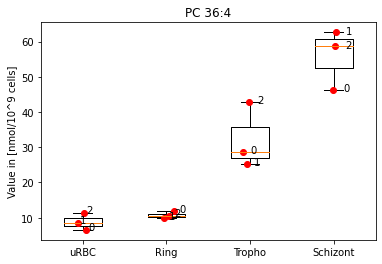

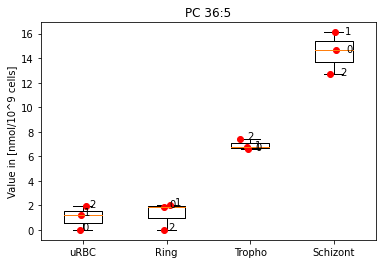

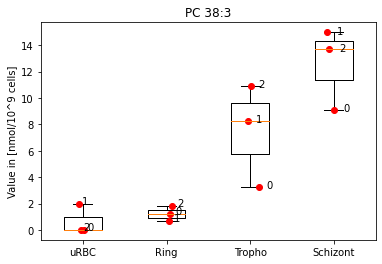

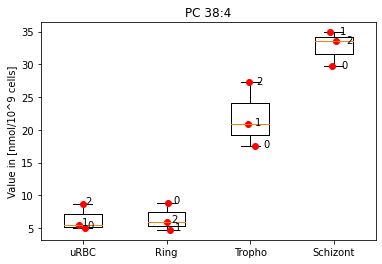

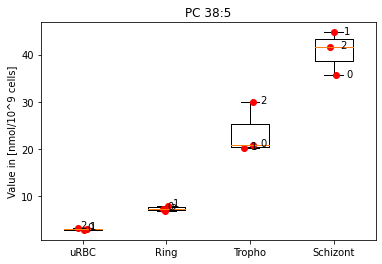

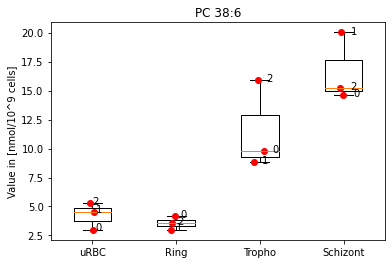

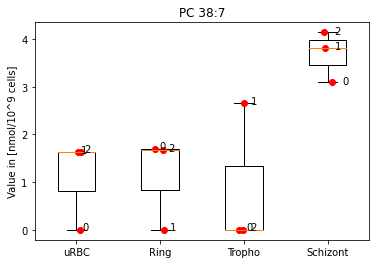

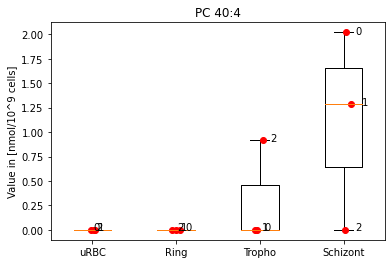

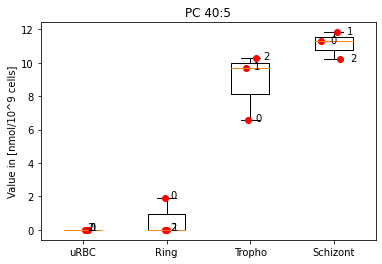

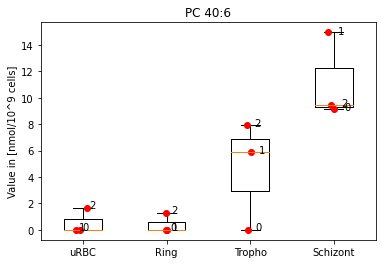

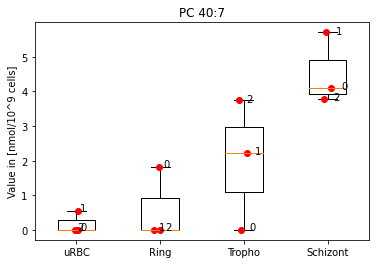

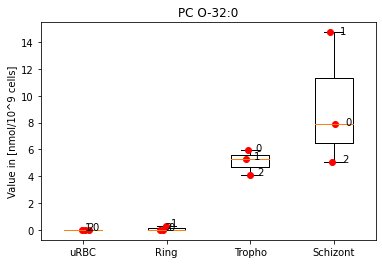

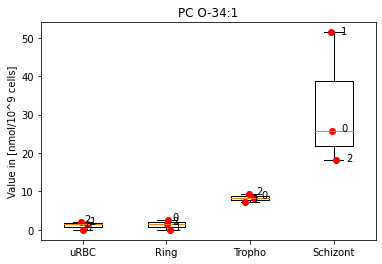

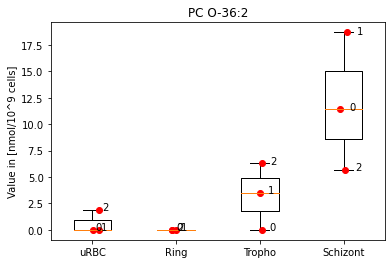

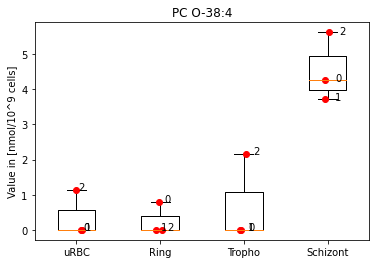

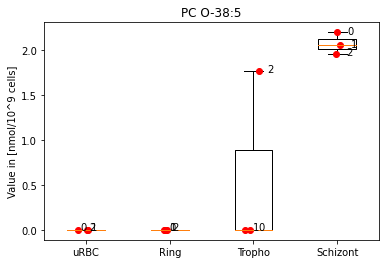

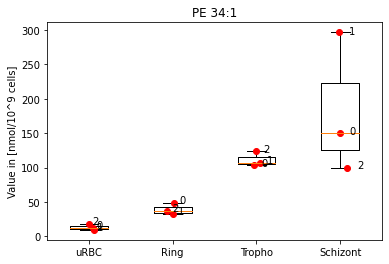

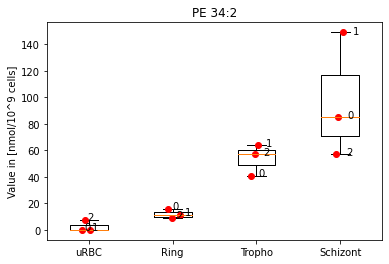

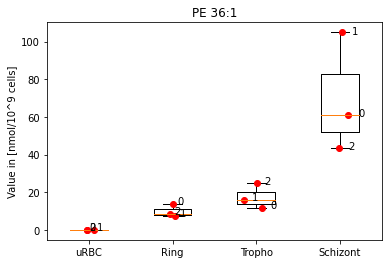

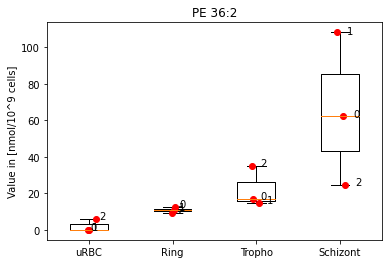

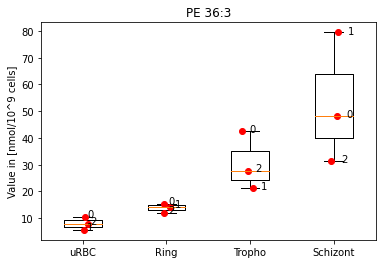

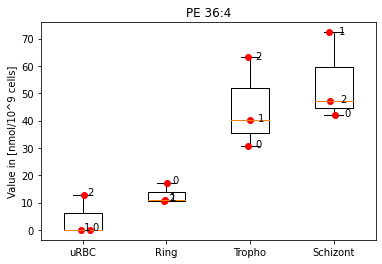

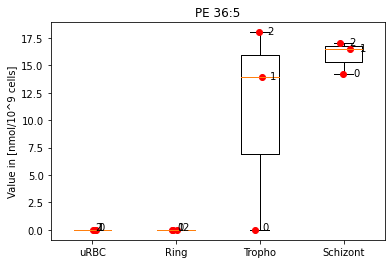

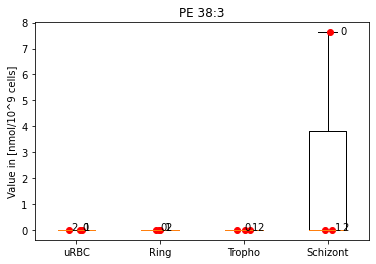

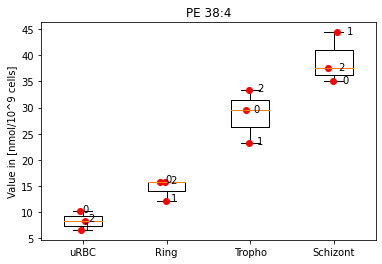

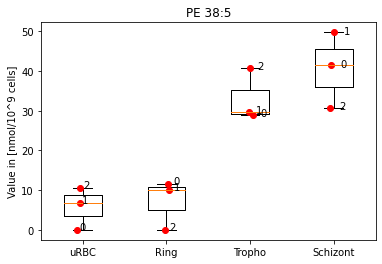

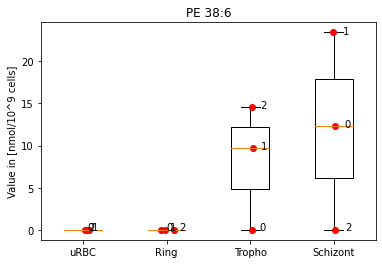

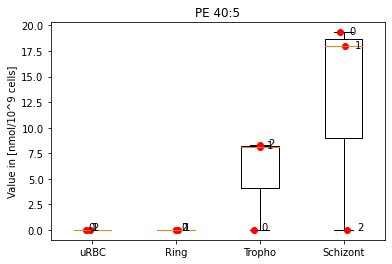

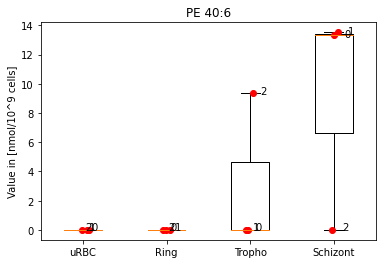

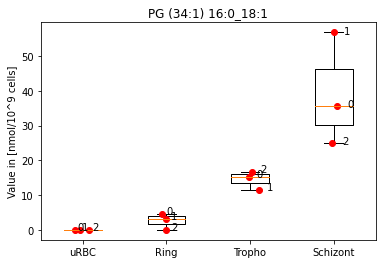

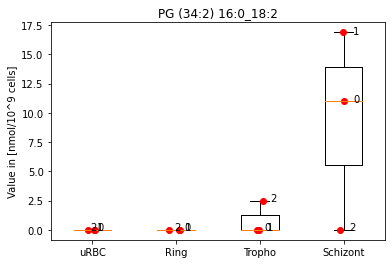

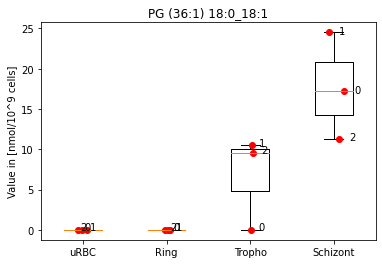

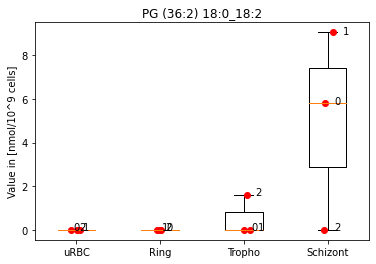

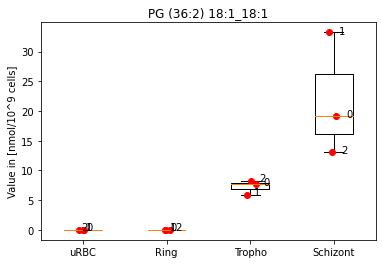

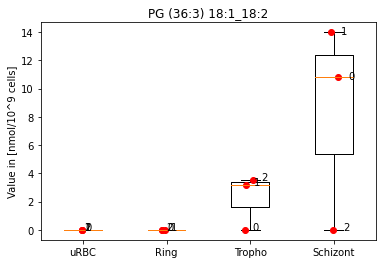

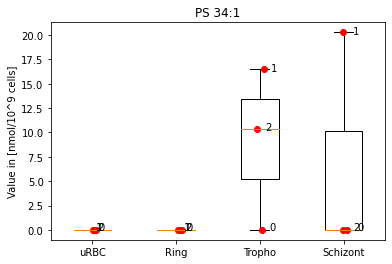

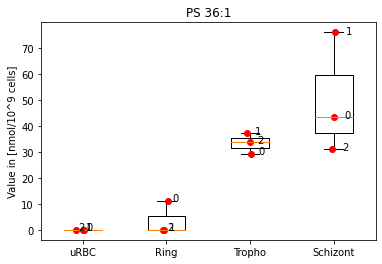

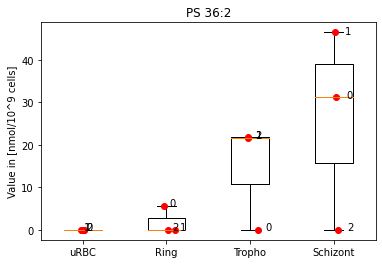

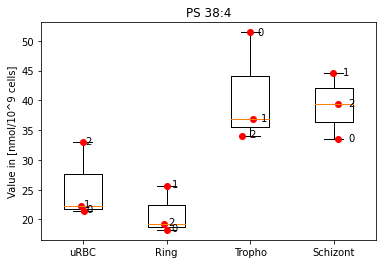

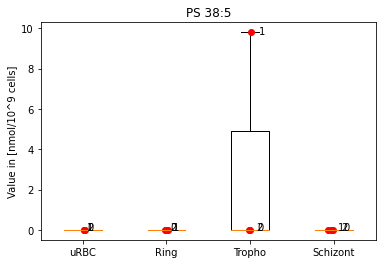

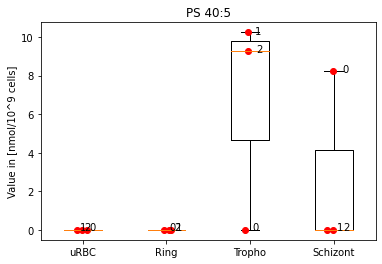

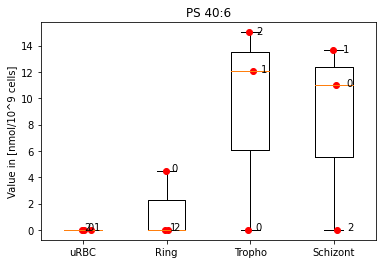

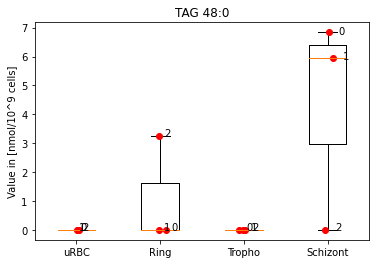

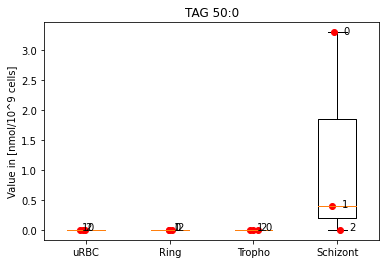

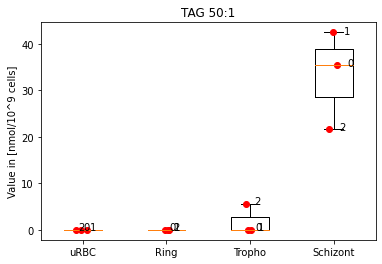

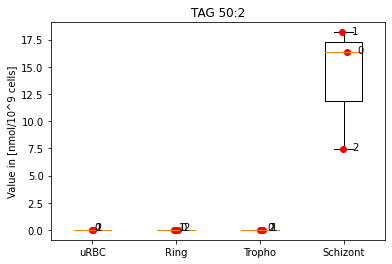

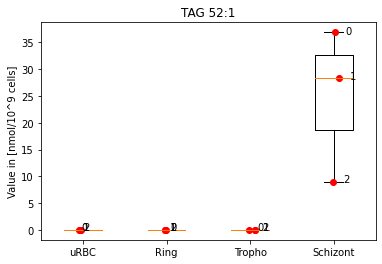

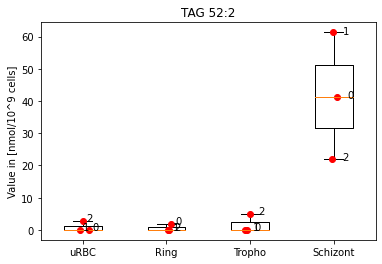

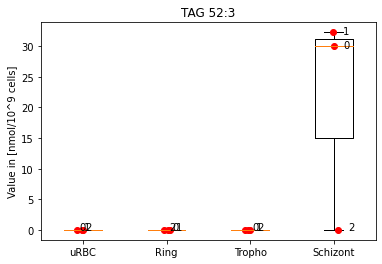

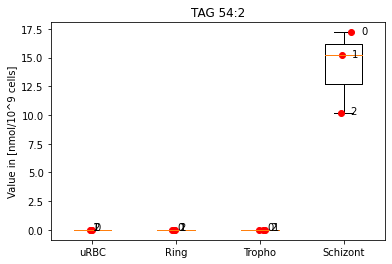

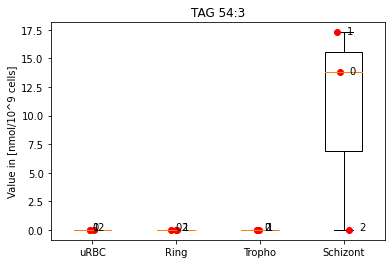

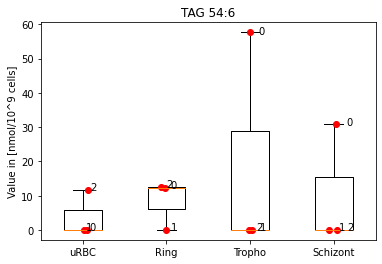

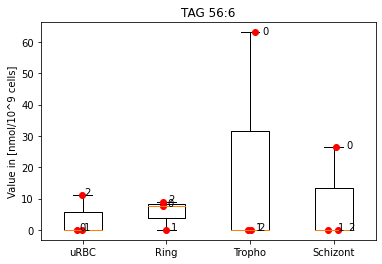

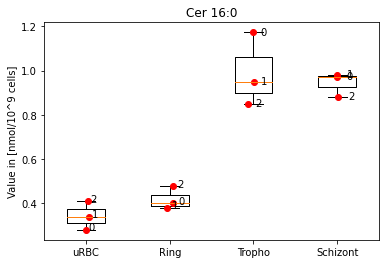

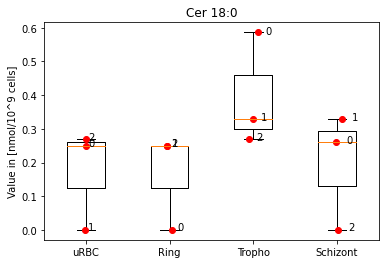

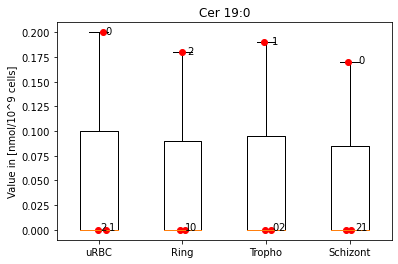

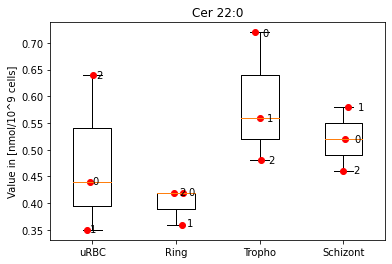

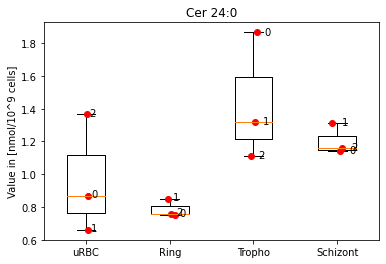

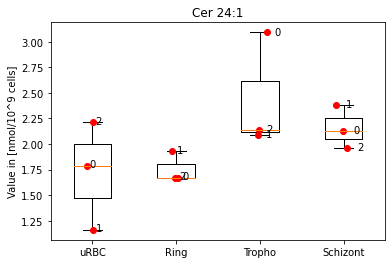

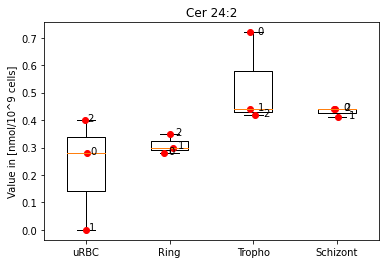

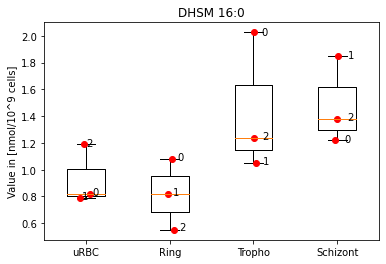

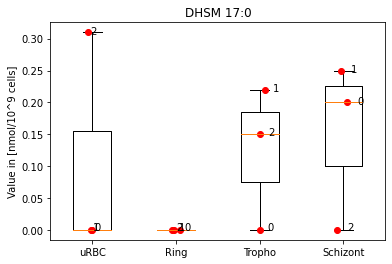

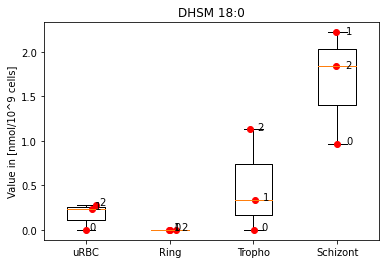

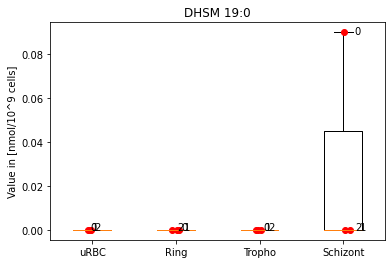

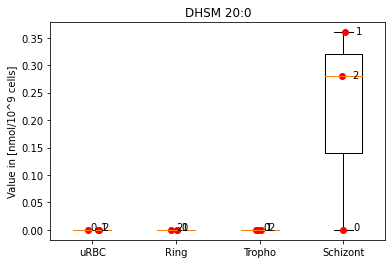

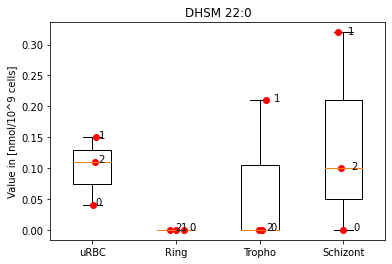

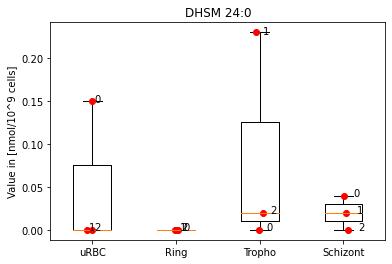

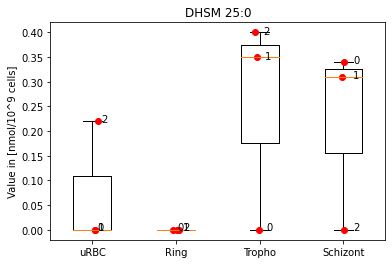

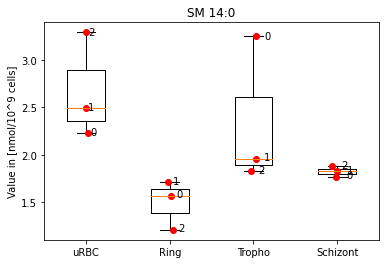

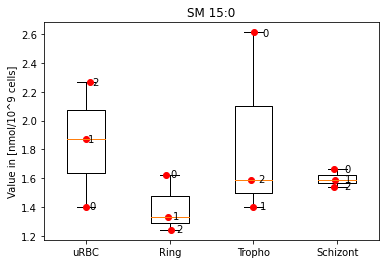

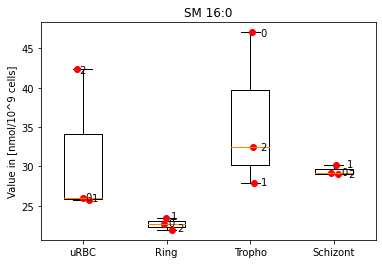

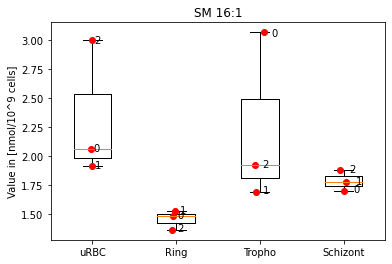

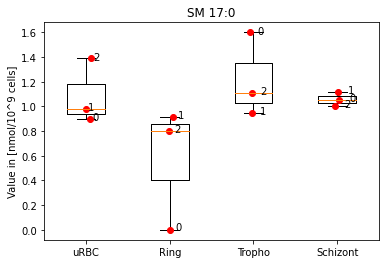

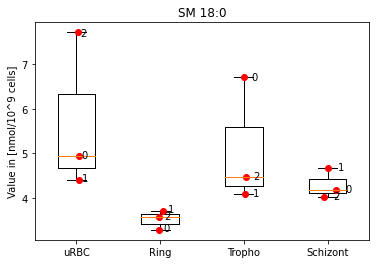

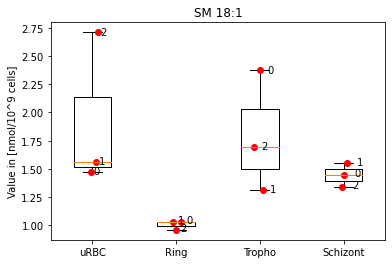

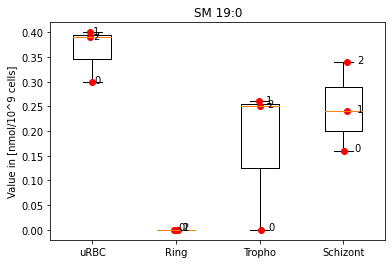

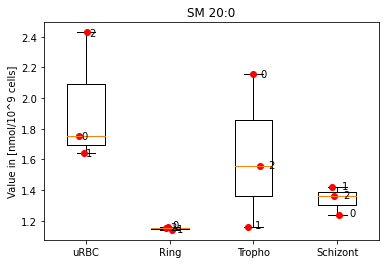

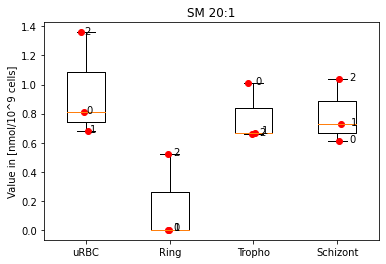

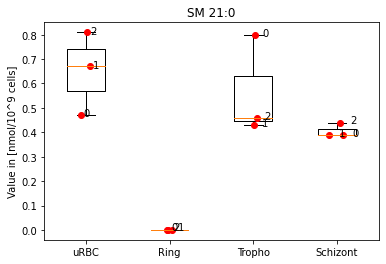

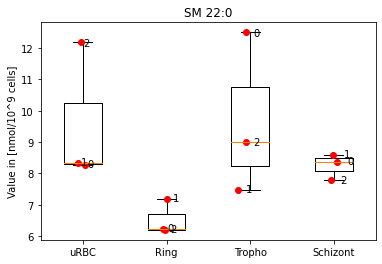

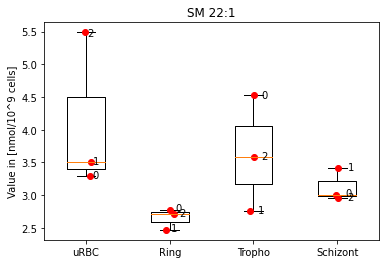

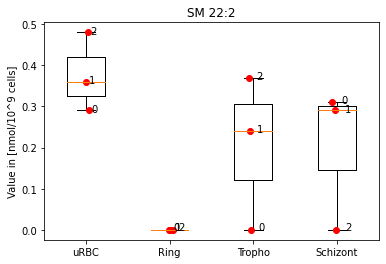

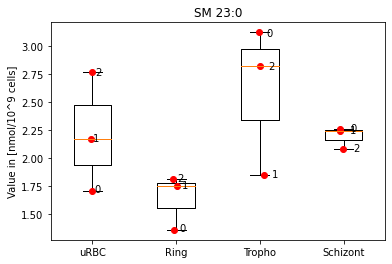

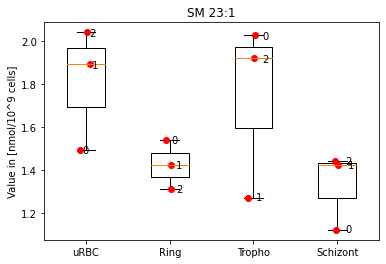

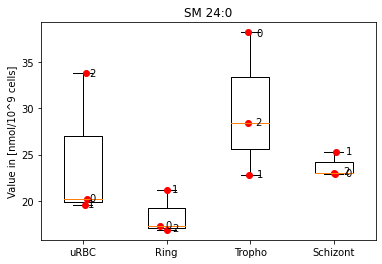

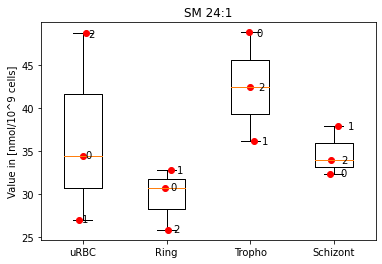

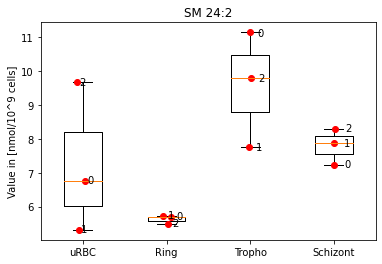

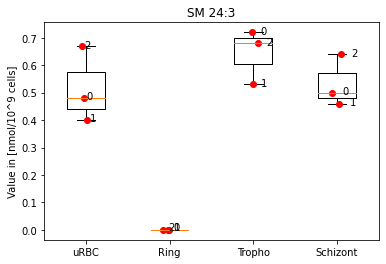

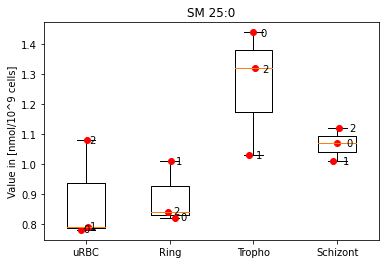

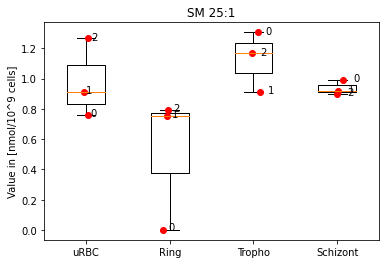

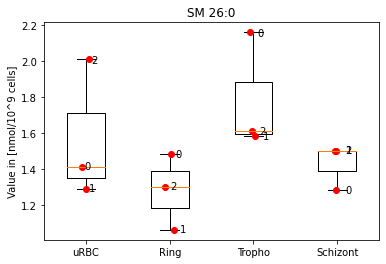

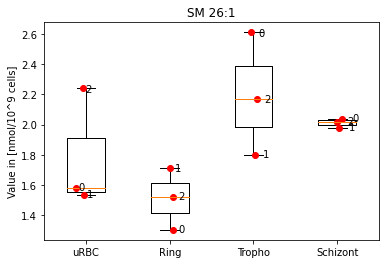

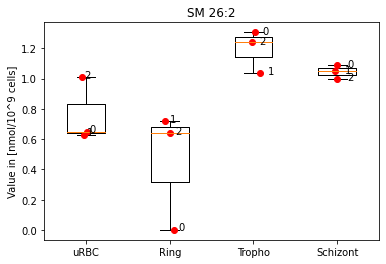

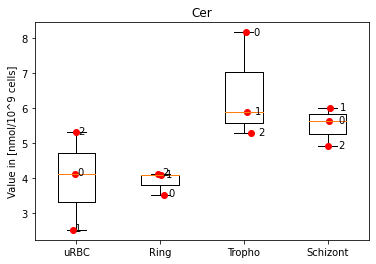

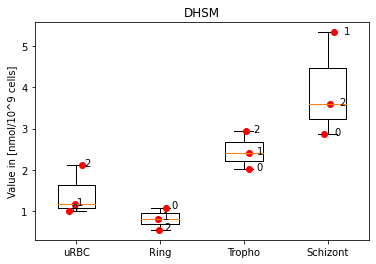

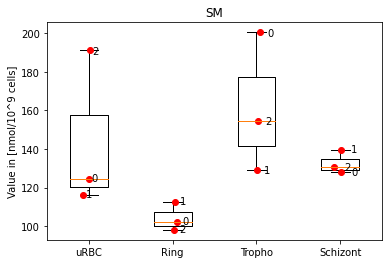

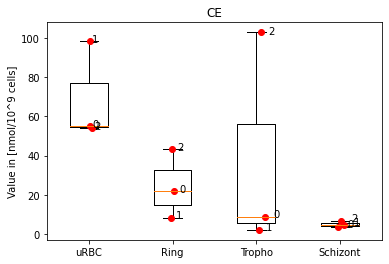

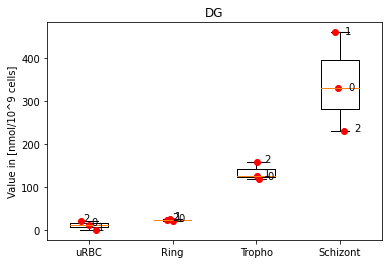

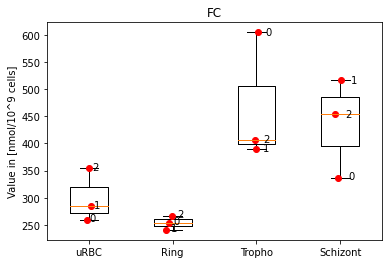

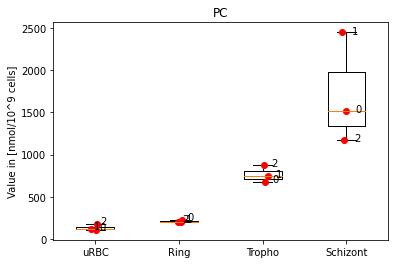

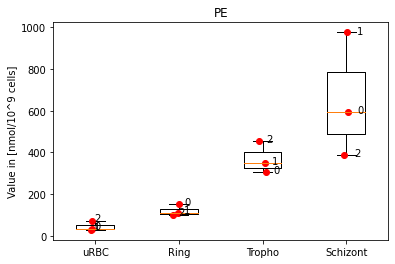

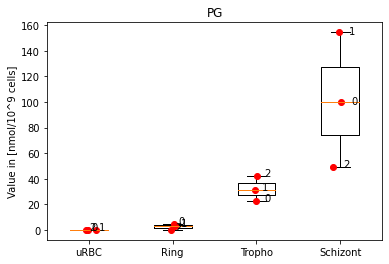

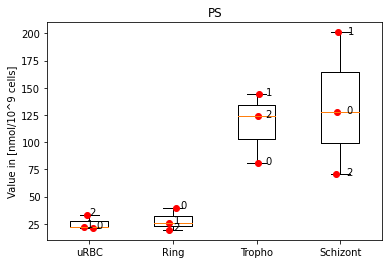

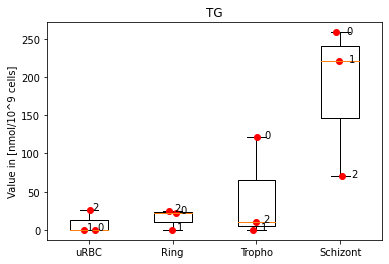

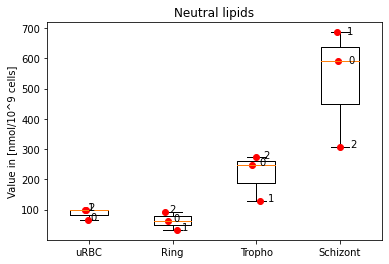

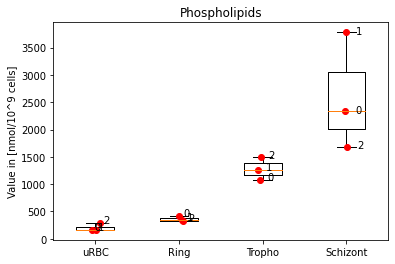

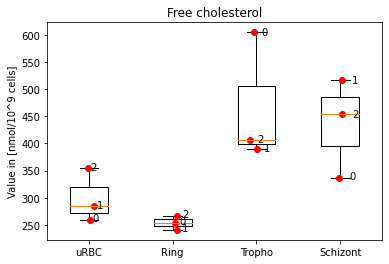

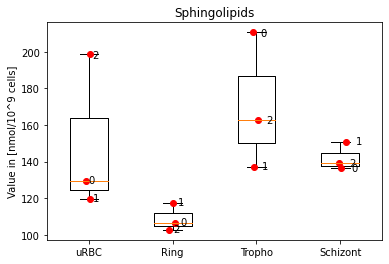

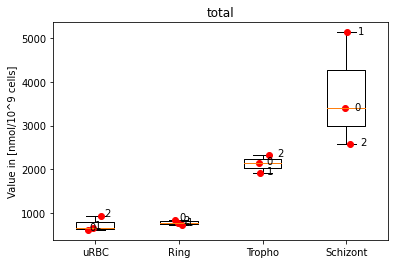

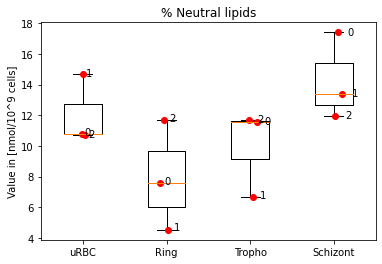

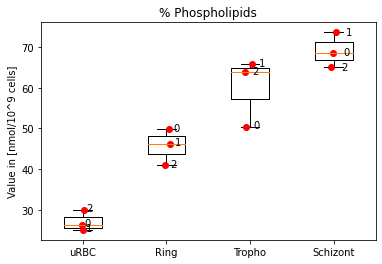

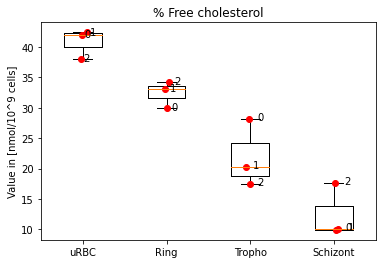

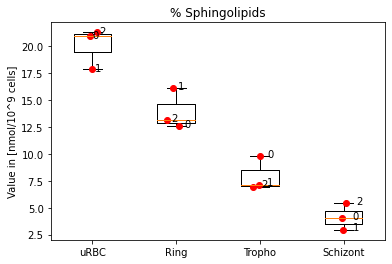

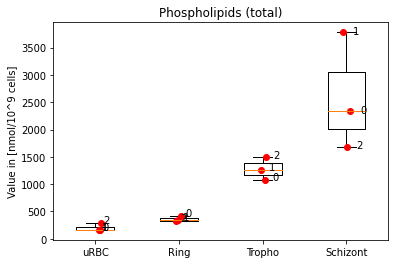

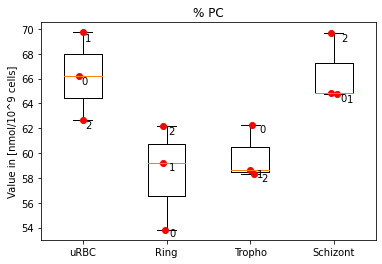

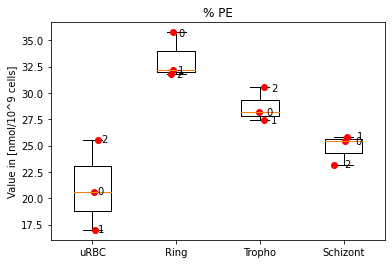

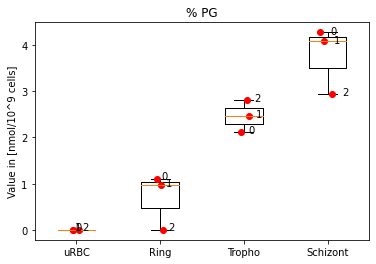

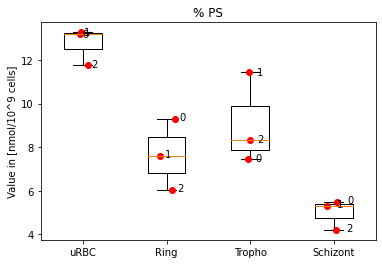

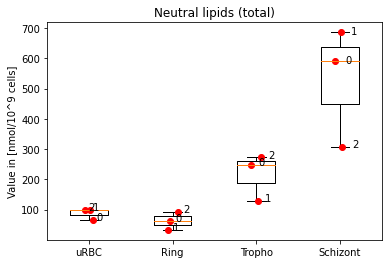

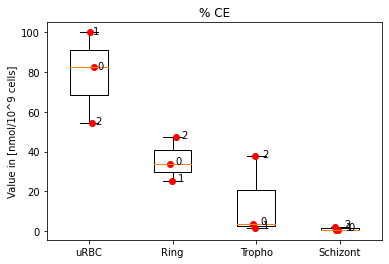

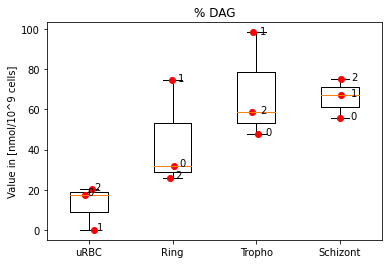

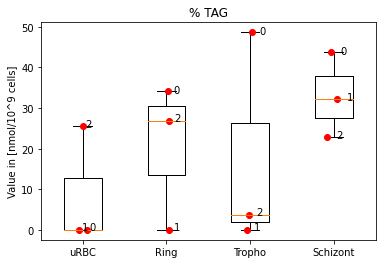

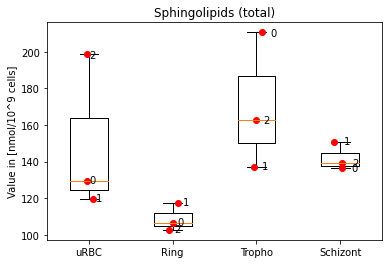

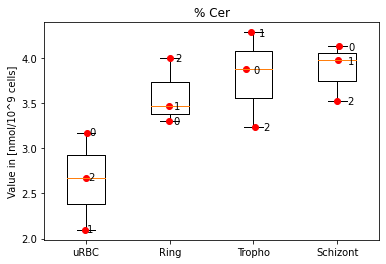

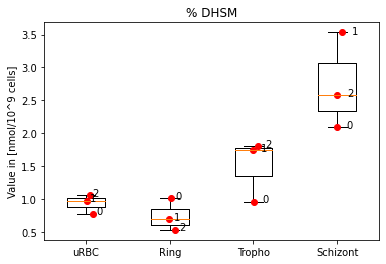

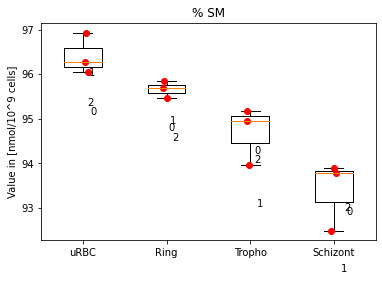

In [8]:
phases = ['uRBC','Ring','Tropho','Schizont']
fig, ax = plt.subplots()
for key in dic.keys():
    data = dic[key]
    #plot data of each metabolite values of each time point
    plt.boxplot(data)
    #make red dots and lable each data point
    for i in range(len(data)):
        y = data[i]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0, markersize=12)
        
        for ids, txt in enumerate(y):
            _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
    _ = plt.title(key)
    _ = plt.ylabel('Value in [nmol/10^9 cells]')
    _ = plt.xticks(np.arange(4)+1,('uRBC','Ring','Tropho','Schizont'))

    plt.show()
    plt.close()

Produce boxplot and scatter plot of every metabolite class in each phase

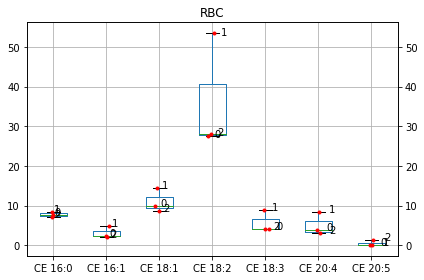

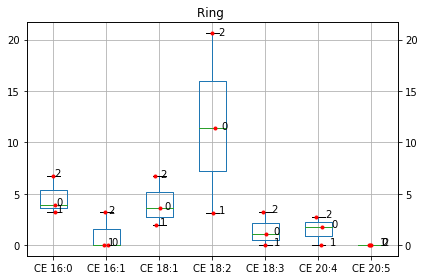

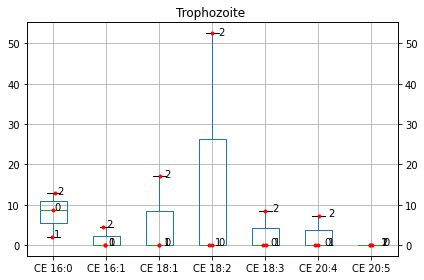

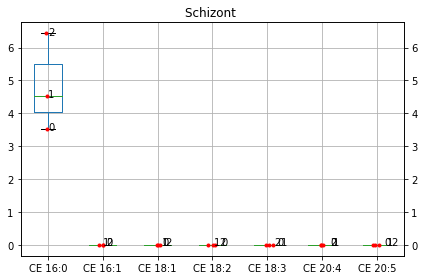

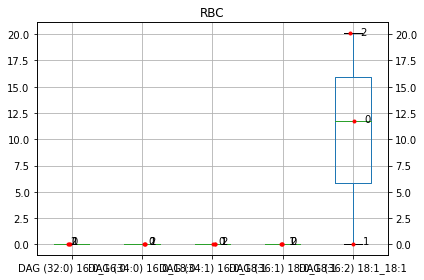

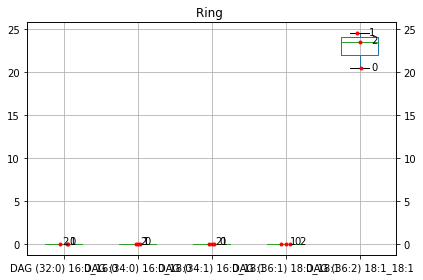

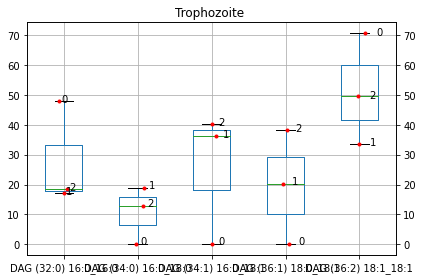

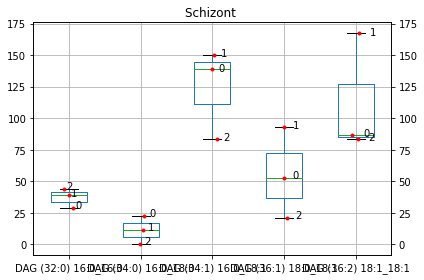

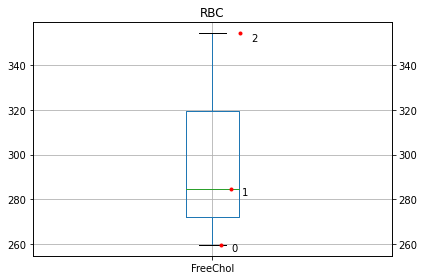

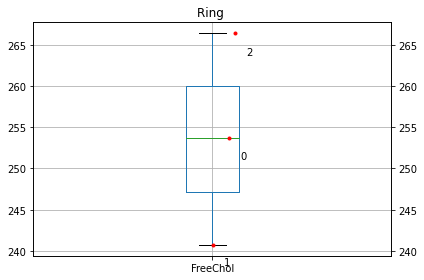

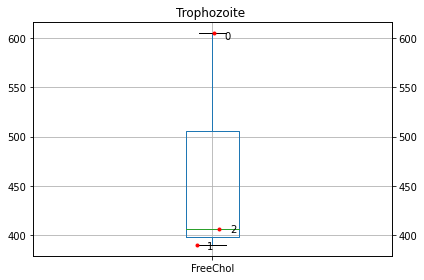

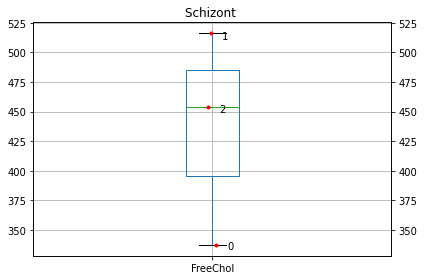

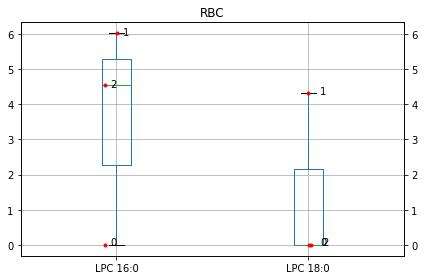

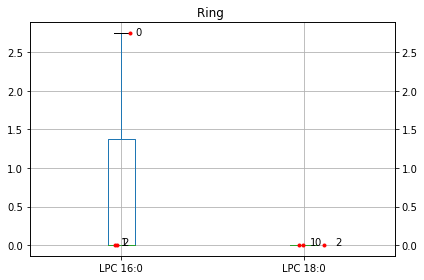

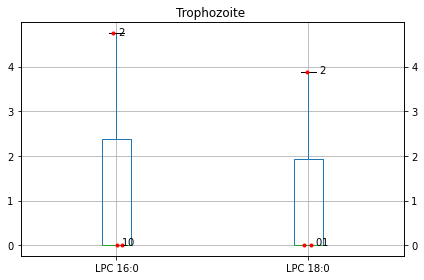

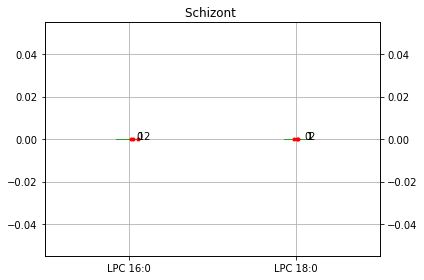

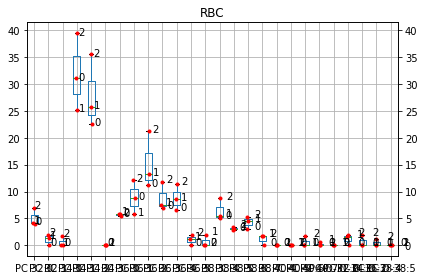

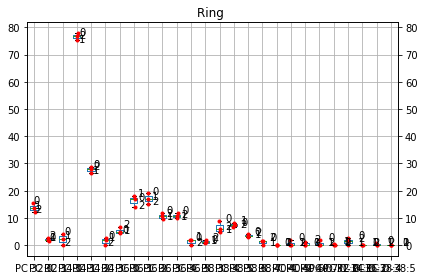

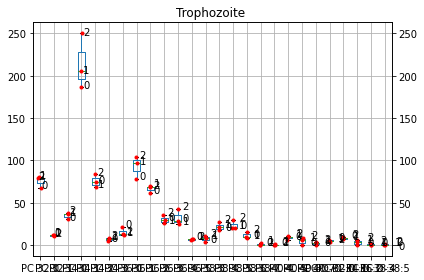

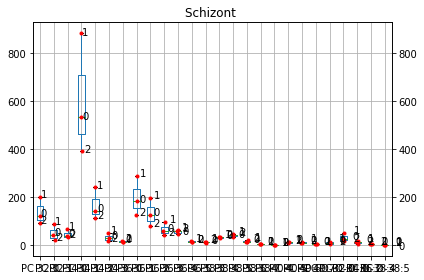

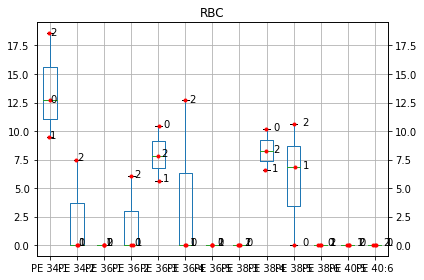

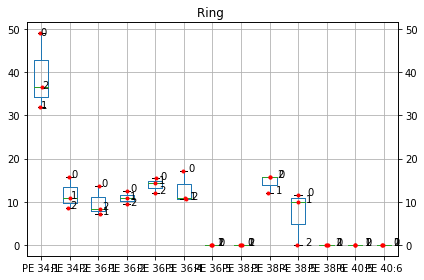

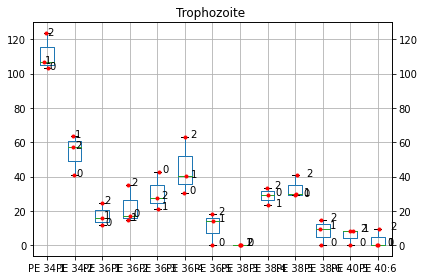

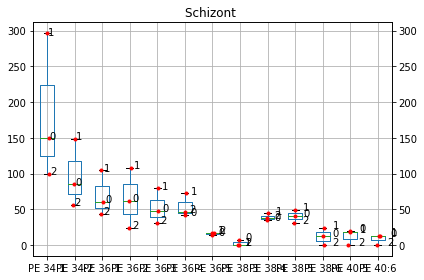

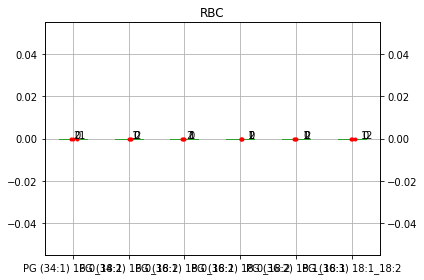

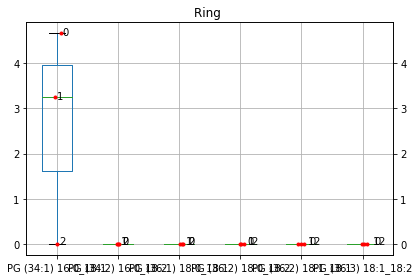

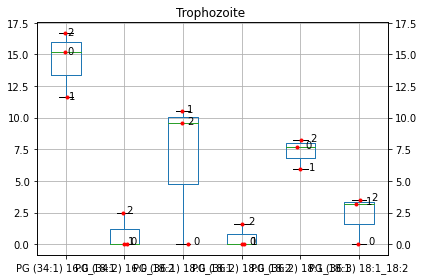

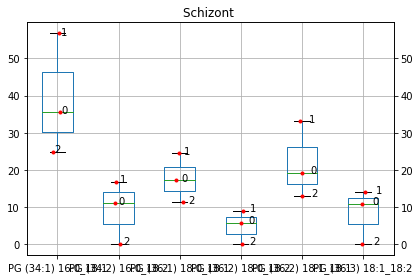

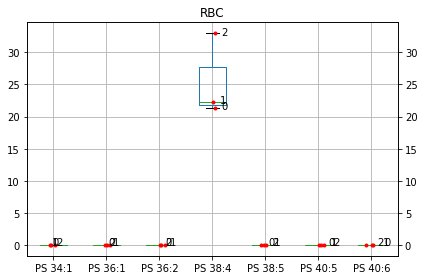

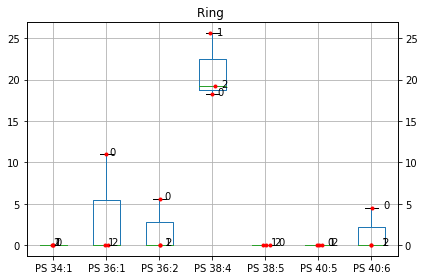

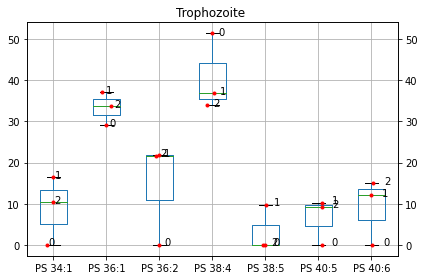

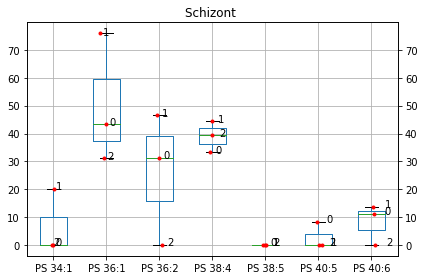

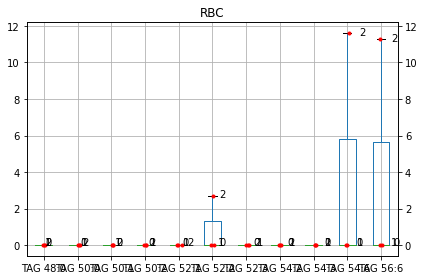

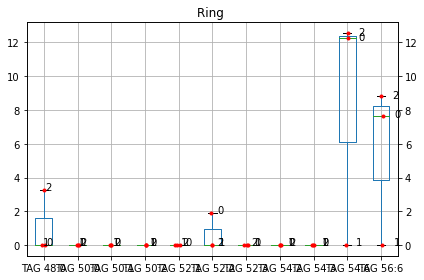

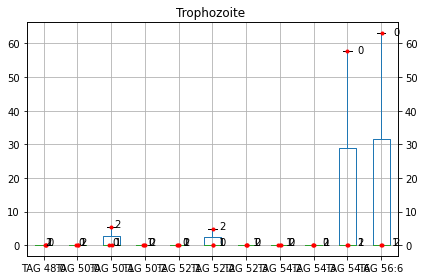

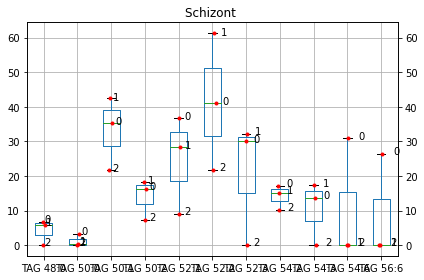

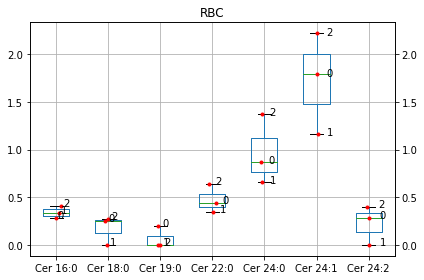

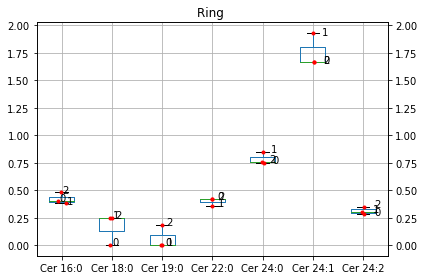

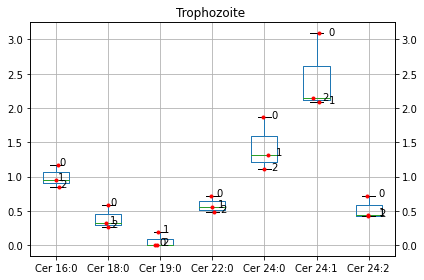

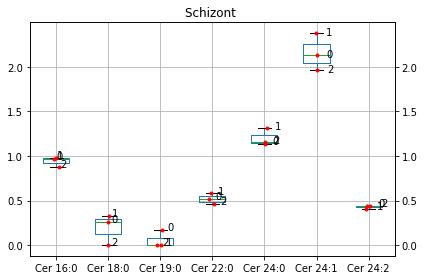

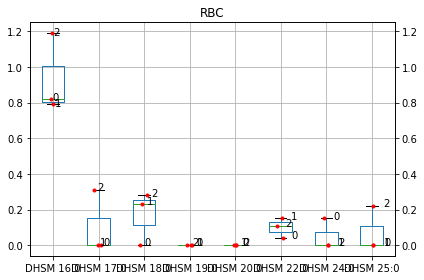

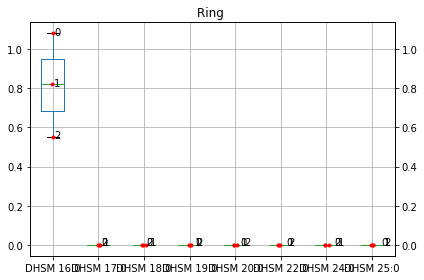

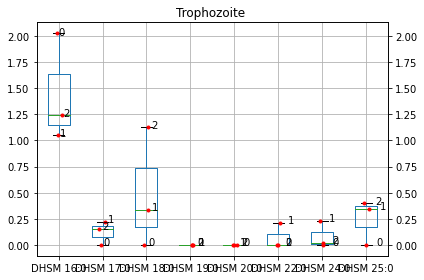

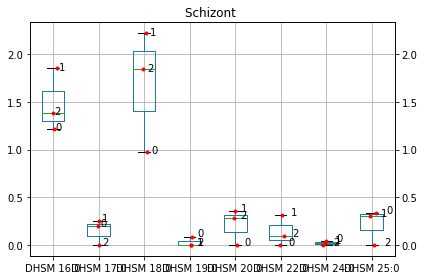

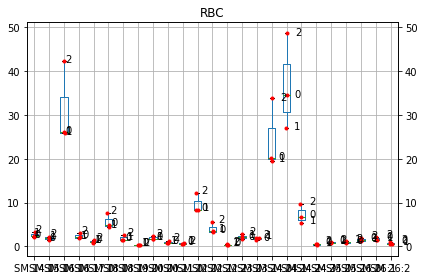

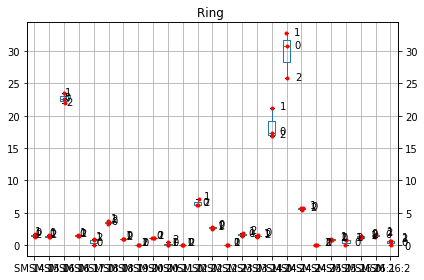

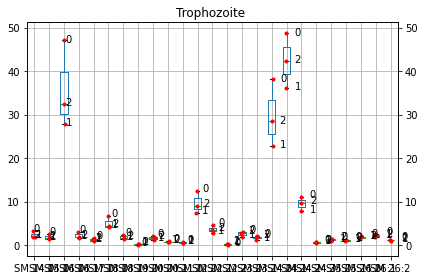

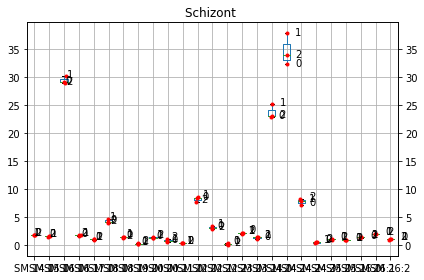

In [15]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase

    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        _ = data.boxplot()
        _ = plt.twinx()
        
        for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            _ = plt.plot(x, y, 'r.', alpha=1.0)
            
            for ids, txt in enumerate(y):
                _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
        plt.xticks(rotation='vertical')
        plt.title(phase)
        plt.tight_layout()
        plt.show()
        plt.close()

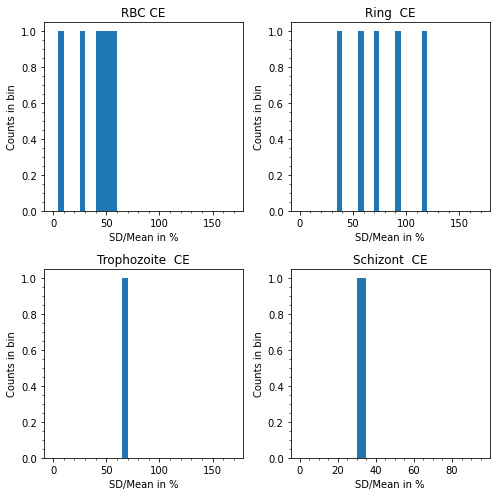

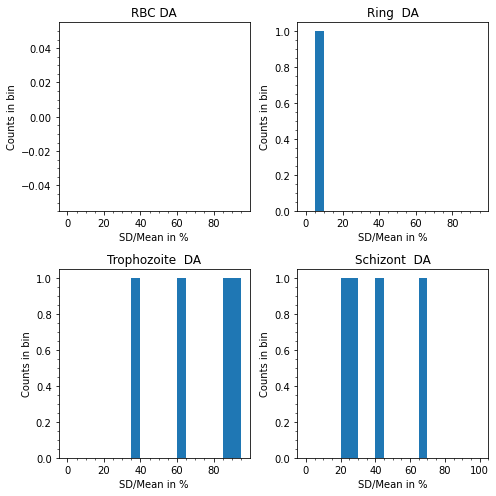

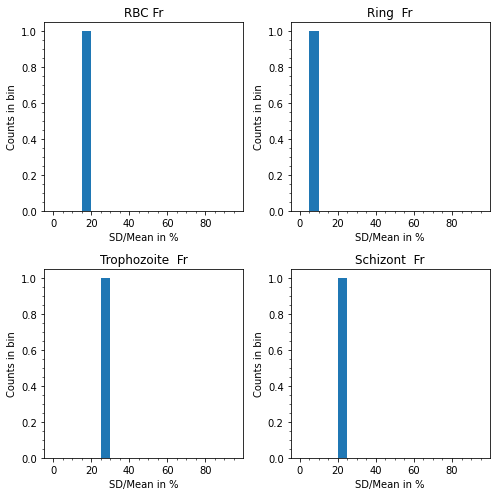

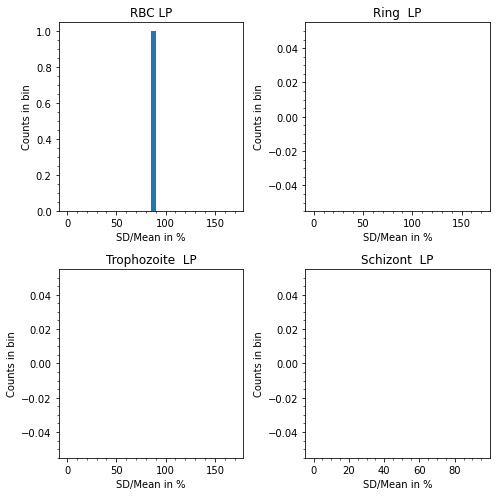

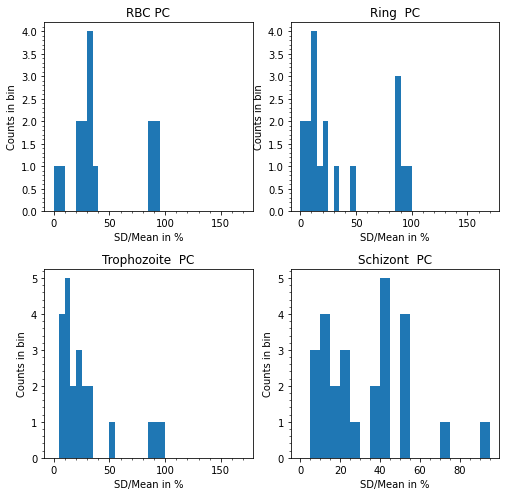

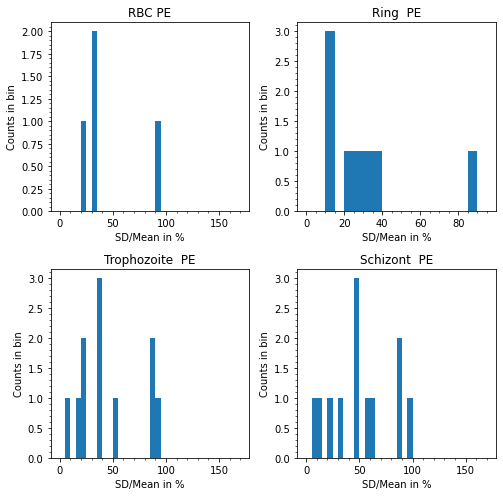

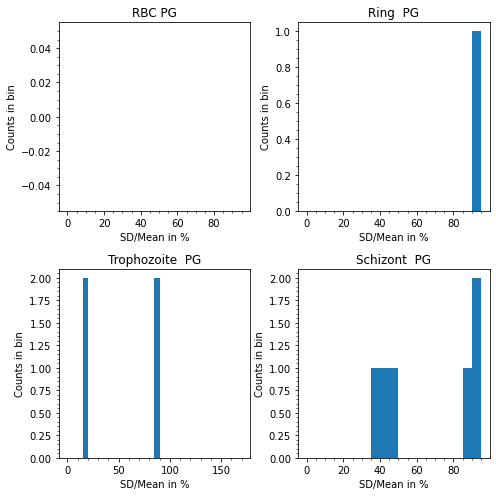

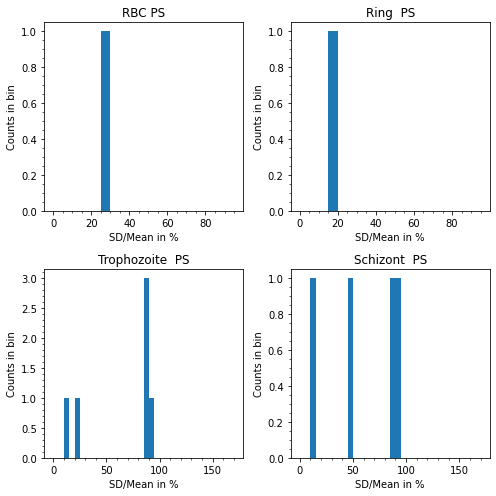

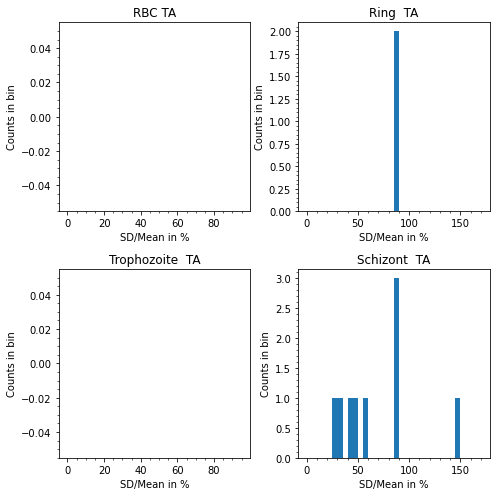

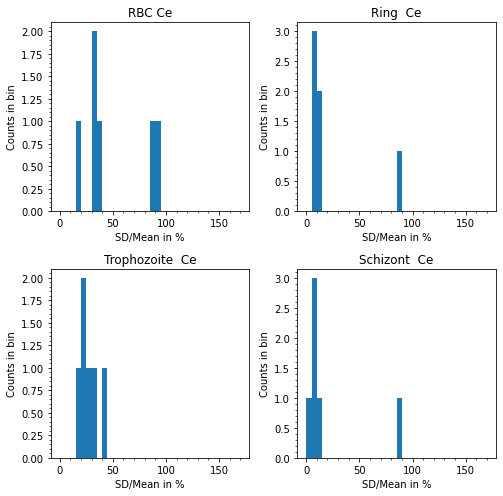

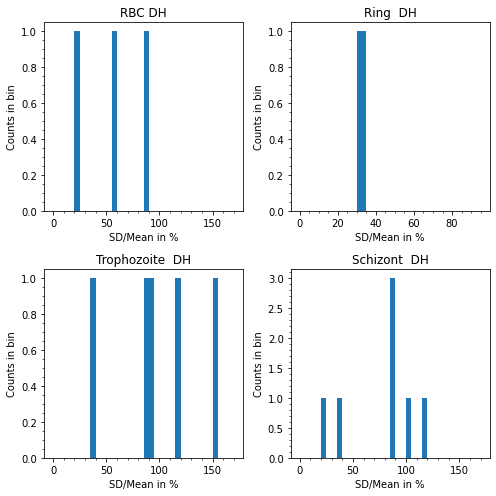

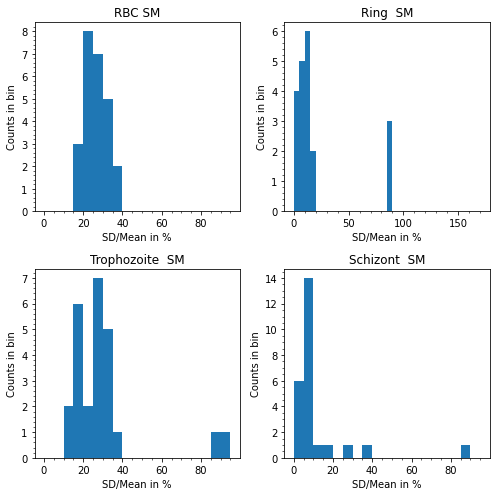

In [21]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
    
    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        maxium = 100
        if maxium < max(data.std()/data.mean()*100):
            maxium = max(data.std()/data.mean()*100+5)
        bins = np.arange(0,maxium,5)
        try:
            _ = axs.flat[i].hist(data.std()/data.mean()*100, bins=bins)
            _ = axs.flat[i].set_title(phase +' '+ data.columns[0][:2])
        except:pass
        
        _ = axs.flat[i].set_xlabel('SD/Mean in %')
        _ = axs.flat[i].set_ylabel('Counts in bin')
        _ = axs.flat[i].minorticks_on()
    fig.tight_layout()

             RBC1   RBC2   RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                               
CE 16:0      7.58   8.47   7.04    3.94    3.25    6.76            8.8   
CE 16:1      2.30   4.90   2.11    0.00    0.00    3.19            0.0   
CE 18:1      9.94  14.40   8.71    3.57    1.93    6.69            0.0   
CE 18:2     27.43  53.54  27.97   11.40    3.10   20.64            0.0   
CE 18:3      3.98   8.98   4.14    1.04    0.00    3.21            0.0   
CE 20:4      3.75   8.32   3.03    1.74    0.00    2.72            0.0   
CE 20:5      0.00   0.00   1.21    0.00    0.00    0.00            0.0   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
CE 16:0              2.06          12.86        3.53        4.53        6.44  
CE 16:1              0.00           4.53        0.00        0.00        0.00  
CE 18:1          

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


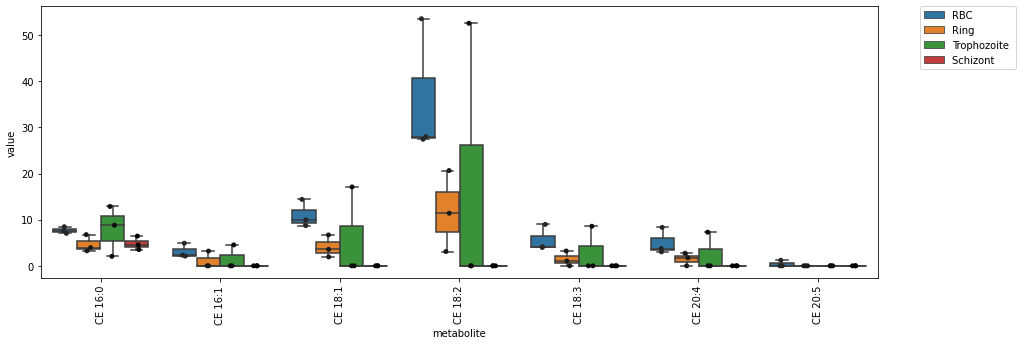

                       RBC1  RBC2   RBC3  Ring 1  Ring 2  Ring 3  \
Unnamed: 0                                                         
DAG (32:0) 16:0_16:0   0.00   0.0   0.00    0.00    0.00    0.00   
DAG (34:0) 16:0_18:0   0.00   0.0   0.00    0.00    0.00    0.00   
DAG (34:1) 16:0_18:1   0.00   0.0   0.00    0.00    0.00    0.00   
DAG (36:1) 18:0_18:1   0.00   0.0   0.00    0.00    0.00    0.00   
DAG (36:2) 18:1_18:1  11.72   0.0  20.12   20.44   24.56   23.55   

                      Trophozoite 1  Trophozoite 2  Trophozoite 3  Schizont 1  \
Unnamed: 0                                                                      
DAG (32:0) 16:0_16:0      47.866667          17.06          18.46       28.83   
DAG (34:0) 16:0_18:0       0.000000          18.97          12.90       22.55   
DAG (34:1) 16:0_18:1       0.000000          36.24          40.16      138.65   
DAG (36:1) 18:0_18:1       0.000000          20.19          38.21       52.63   
DAG (36:2) 18:1_18:1      70.720000  

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


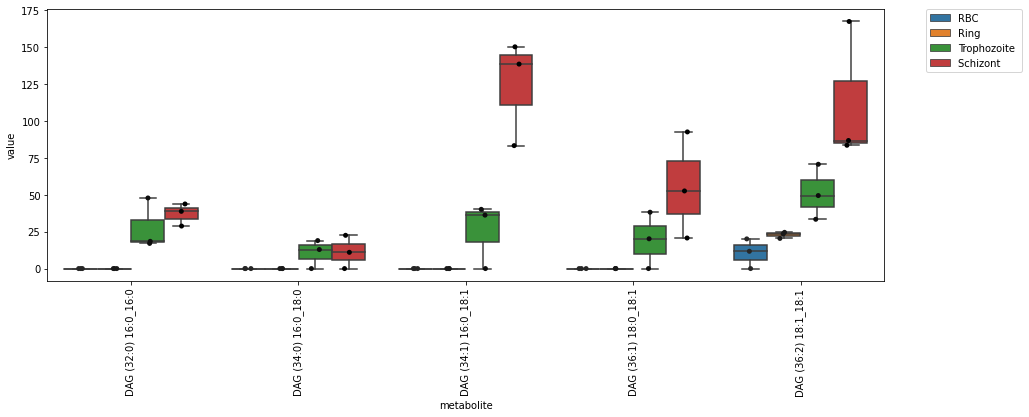

              RBC1    RBC2    RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                                  
FreeChol    259.35  284.38  354.46  253.64   240.7  266.43     604.933333   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
FreeChol           390.02          406.9      337.01      516.47      453.88  
   metabolite          Phase       value
0    FreeChol           RBC1  259.350000
1    FreeChol           RBC2  284.380000
2    FreeChol           RBC3  354.460000
3    FreeChol         Ring 1  253.640000
4    FreeChol         Ring 2  240.700000
5    FreeChol         Ring 3  266.430000
6    FreeChol  Trophozoite 1  604.933333
7    FreeChol  Trophozoite 2  390.020000
8    FreeChol  Trophozoite 3  406.900000
9    FreeChol     Schizont 1  337.010000
10   FreeChol     Schizont 2  516.470000
11   FreeChol     Schizont 3  453.88000

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


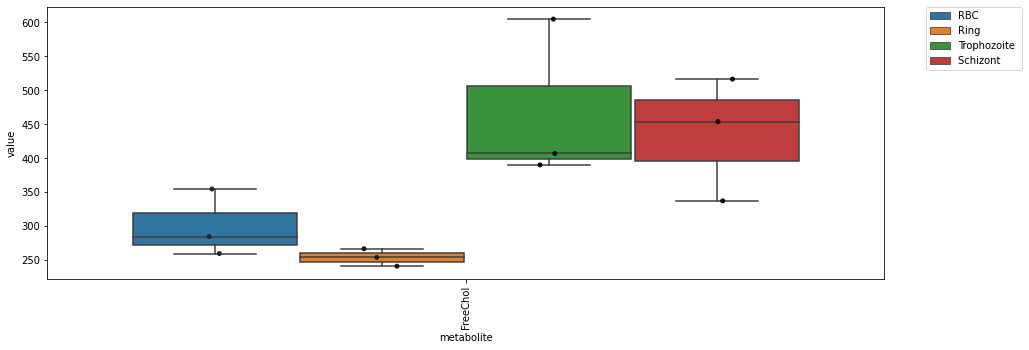

            RBC1  RBC2  RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                            
LPC 16:0     0.0  6.02  4.54    2.75     0.0     0.0            0.0   
LPC 18:0     0.0  4.32  0.00    0.00     0.0     0.0            0.0   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
LPC 16:0              0.0           4.75         0.0         0.0         0.0  
LPC 18:0              0.0           3.88         0.0         0.0         0.0  
   metabolite          Phase  value
0    LPC 16:0           RBC1   0.00
1    LPC 16:0           RBC2   6.02
2    LPC 16:0           RBC3   4.54
3    LPC 16:0         Ring 1   2.75
4    LPC 16:0         Ring 2   0.00
5    LPC 16:0         Ring 3   0.00
6    LPC 16:0  Trophozoite 1   0.00
7    LPC 16:0  Trophozoite 2   0.00
8    LPC 16:0  Trophozoite 3   4.75
9    LPC 16:0     Schizont 1   0.00
10 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


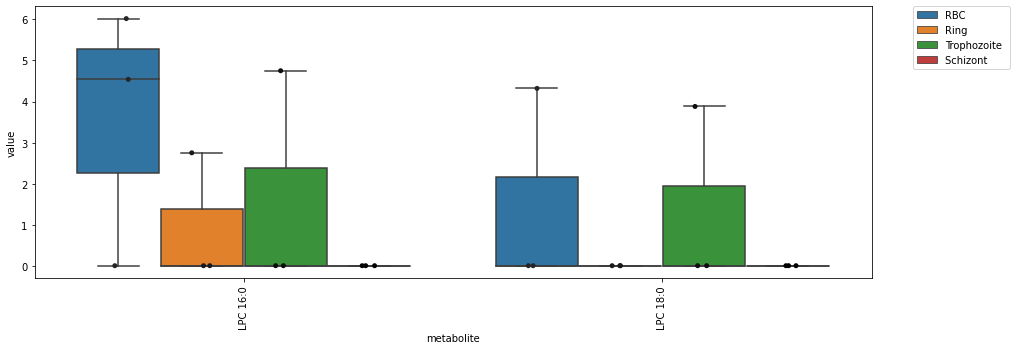

             RBC1   RBC2   RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                               
PC 32:0      3.90   4.22   6.90   15.54   13.57   12.10      67.786667   
PC 32:1      0.00   1.30   1.94    1.87    1.67    2.46      12.133333   
PC 34:0      0.00   0.00   1.65    4.17    2.45    0.00      30.320000   
PC 34:1     31.12  25.27  39.52   77.90   75.44   76.77     186.613333   
PC 34:2     22.55  25.78  35.53   28.85   26.56   28.01      74.293333   
PC 34:3      0.00   0.00   0.00    2.50    1.87    0.00       5.226667   
PC 36:0      5.46   5.88   5.72    4.78    4.49    6.61      21.386667   
PC 36:1      8.70   5.72  12.12   16.87   18.12   13.85      78.560000   
PC 36:2     11.18  13.17  21.22   19.08   17.09   15.04      61.600000   
PC 36:3      6.96   7.51  11.77   11.75    9.53   10.71      29.413333   
PC 36:4      6.54   8.54  11.46   11.80    9.82   10.54      28.586667   
PC 36:5      0.00   1.18   1.91    1.8

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


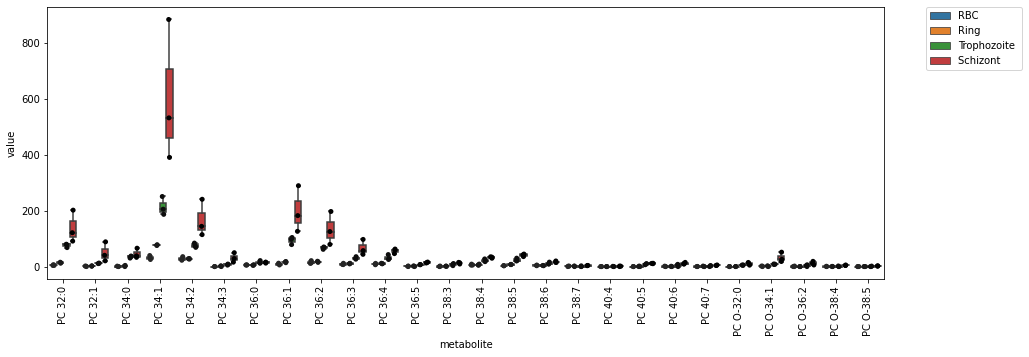

             RBC1  RBC2   RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                              
PE 34:1     12.69  9.49  18.59   49.01   31.98   36.52     103.466667   
PE 34:2      0.00  0.00   7.48   15.75   10.95    8.64      40.880000   
PE 36:1      0.00  0.00   0.00   13.75    7.31    8.36      11.653333   
PE 36:2      0.00  0.00   6.06   12.54   10.81    9.41      17.200000   
PE 36:3     10.48  5.64   7.85   15.45   14.36   12.08      42.720000   
PE 36:4      0.00  0.00  12.68   17.22   10.83   10.69      30.613333   
PE 36:5      0.00  0.00   0.00    0.00    0.00    0.00       0.000000   
PE 38:3      0.00  0.00   0.00    0.00    0.00    0.00       0.000000   
PE 38:4     10.15  6.57   8.25   15.80   12.12   15.77      29.493333   
PE 38:5      0.00  6.85  10.61   11.59    9.99    0.00      28.960000   
PE 38:6      0.00  0.00   0.00    0.00    0.00    0.00       0.000000   
PE 40:5      0.00  0.00   0.00    0.00    0.00    0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


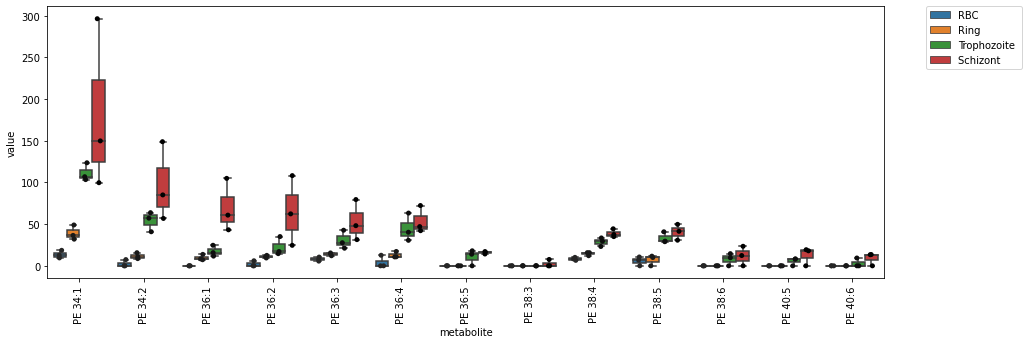

                     RBC1  RBC2  RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                                     
PG (34:1) 16:0_18:1   0.0   0.0   0.0    4.66    3.24     0.0          15.20   
PG (34:2) 16:0_18:2   0.0   0.0   0.0    0.00    0.00     0.0           0.00   
PG (36:1) 18:0_18:1   0.0   0.0   0.0    0.00    0.00     0.0           0.00   
PG (36:2) 18:0_18:2   0.0   0.0   0.0    0.00    0.00     0.0           0.00   
PG (36:2) 18:1_18:1   0.0   0.0   0.0    0.00    0.00     0.0           7.68   
PG (36:3) 18:1_18:2   0.0   0.0   0.0    0.00    0.00     0.0           0.00   

                     Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  \
Unnamed: 0                                                                  
PG (34:1) 16:0_18:1          11.61          16.69       35.61       56.85   
PG (34:2) 16:0_18:2           0.00           2.49       11.03       16.89   
PG (36:1) 18:0_18:1          10.56           9.58  

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


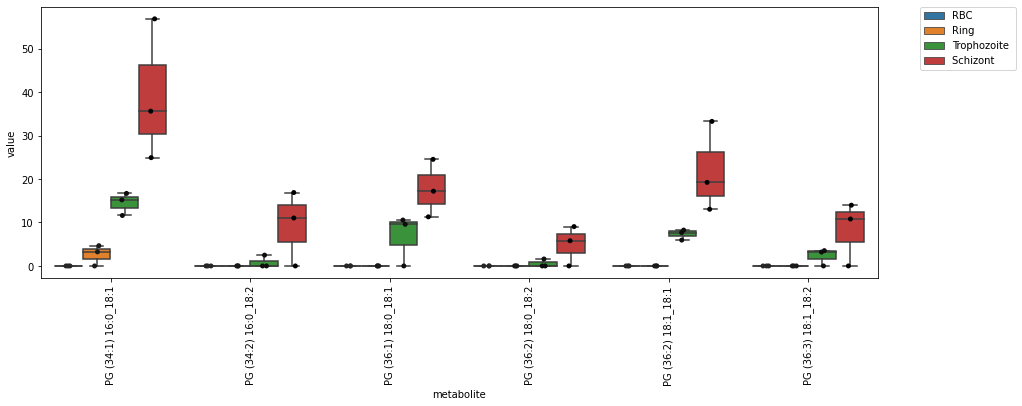

             RBC1   RBC2  RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                              
PS 34:1      0.00   0.00   0.0    0.00    0.00    0.00       0.000000   
PS 36:1      0.00   0.00   0.0   10.98    0.00    0.00      29.253333   
PS 36:2      0.00   0.00   0.0    5.61    0.00    0.00       0.000000   
PS 38:4     21.38  22.31  33.0   18.25   25.63   19.28      51.440000   
PS 38:5      0.00   0.00   0.0    0.00    0.00    0.00       0.000000   
PS 40:5      0.00   0.00   0.0    0.00    0.00    0.00       0.000000   
PS 40:6      0.00   0.00   0.0    4.51    0.00    0.00       0.000000   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
PS 34:1             16.51          10.37        0.00       20.29        0.00  
PS 36:1             37.20          33.71       43.38       76.02       31.08  
PS 36:2             21.91 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


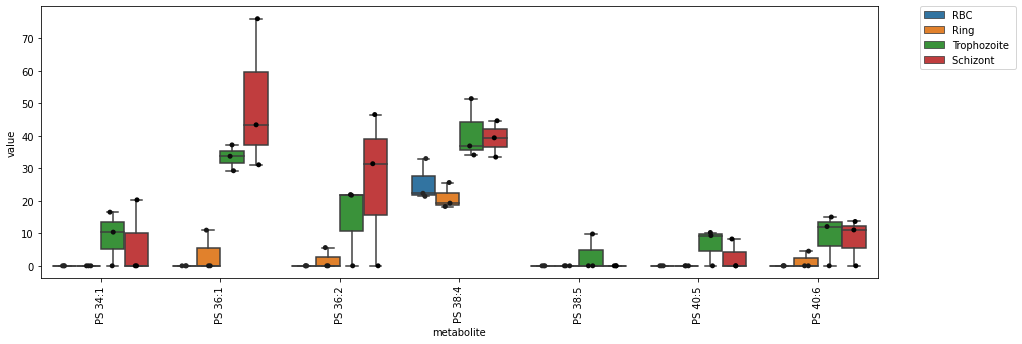

            RBC1  RBC2   RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                             
TAG 48:0     0.0   0.0   0.00    0.00     0.0    3.26       0.000000   
TAG 50:0     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 50:1     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 50:2     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 52:1     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 52:2     0.0   0.0   2.67    1.93     0.0    0.00       0.000000   
TAG 52:3     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 54:2     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 54:3     0.0   0.0   0.00    0.00     0.0    0.00       0.000000   
TAG 54:6     0.0   0.0  11.61   12.24     0.0   12.55      57.706667   
TAG 56:6     0.0   0.0  11.27    7.66     0.0    8.81      63.120000   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


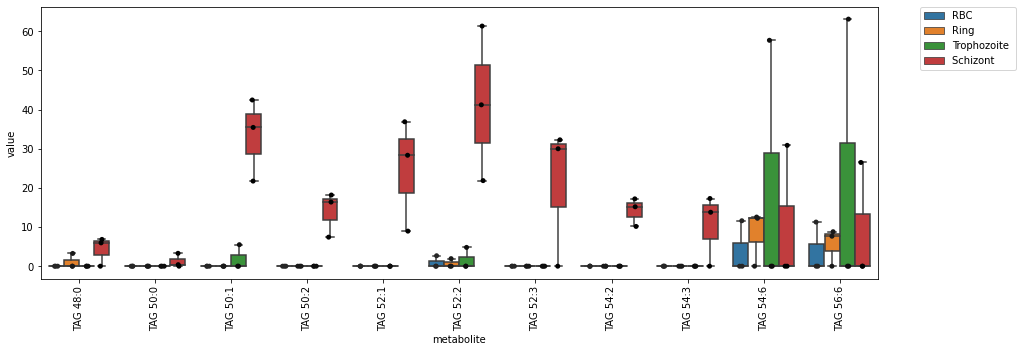

            RBC1  RBC2  RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                            
Cer 16:0    0.28  0.34  0.41    0.40    0.38    0.48       1.173333   
Cer 18:0    0.25  0.00  0.27    0.00    0.25    0.25       0.586667   
Cer 19:0    0.20  0.00  0.00    0.00    0.00    0.18       0.000000   
Cer 22:0    0.44  0.35  0.64    0.42    0.36    0.42       0.720000   
Cer 24:0    0.87  0.66  1.37    0.75    0.85    0.76       1.866667   
Cer 24:1    1.79  1.16  2.22    1.67    1.93    1.67       3.093333   
Cer 24:2    0.28  0.00  0.40    0.28    0.30    0.35       0.720000   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
Cer 16:0             0.95           0.85        0.97        0.98        0.88  
Cer 18:0             0.33           0.27        0.26        0.33        0.00  
Cer 19:0             0.19           0.00    

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


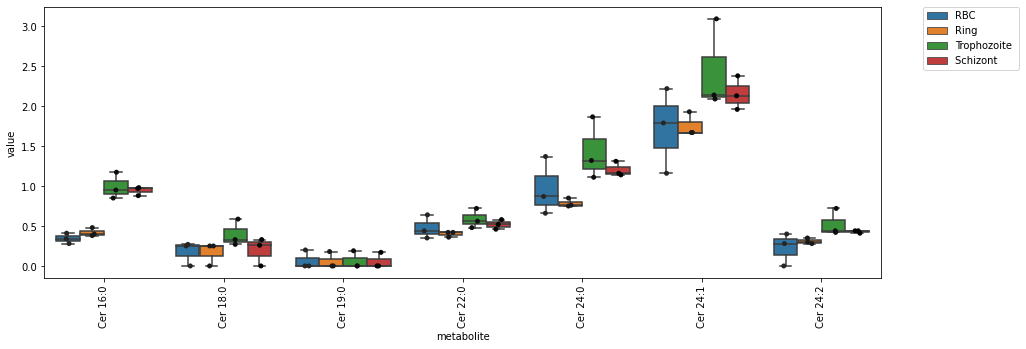

            RBC1  RBC2  RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                            
DHSM 16:0   0.82  0.79  1.19    1.08    0.82    0.55       2.026667   
DHSM 17:0   0.00  0.00  0.31    0.00    0.00    0.00       0.000000   
DHSM 18:0   0.00  0.23  0.28    0.00    0.00    0.00       0.000000   
DHSM 19:0   0.00  0.00  0.00    0.00    0.00    0.00       0.000000   
DHSM 20:0   0.00  0.00  0.00    0.00    0.00    0.00       0.000000   
DHSM 22:0   0.04  0.15  0.11    0.00    0.00    0.00       0.000000   
DHSM 24:0   0.15  0.00  0.00    0.00    0.00    0.00       0.000000   
DHSM 25:0   0.00  0.00  0.22    0.00    0.00    0.00       0.000000   

            Trophozoite 2  Trophozoite 3  Schizont 1  Schizont 2  Schizont 3  
Unnamed: 0                                                                    
DHSM 16:0            1.05           1.24        1.22        1.85        1.38  
DHSM 17:0            0.22           0.15        0.20

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


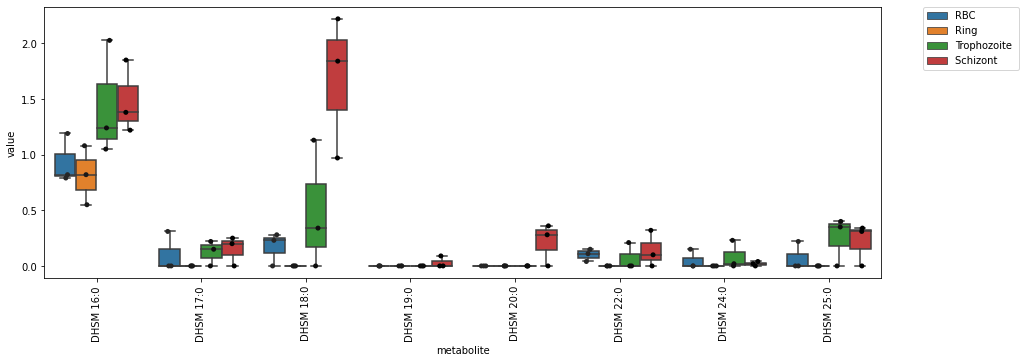

             RBC1   RBC2   RBC3  Ring 1  Ring 2  Ring 3  Trophozoite 1  \
Unnamed: 0                                                               
SM 14:0      2.23   2.49   3.29    1.57    1.71    1.21       3.253333   
SM 15:0      1.40   1.87   2.27    1.62    1.33    1.24       2.613333   
SM 16:0     26.01  25.79  42.35   22.64   23.49   21.93      47.066667   
SM 16:1      2.06   1.91   3.00    1.48    1.52    1.36       3.066667   
SM 17:0      0.90   0.98   1.39    0.00    0.91    0.80       1.600000   
SM 18:0      4.94   4.41   7.72    3.28    3.71    3.56       6.720000   
SM 18:1      1.47   1.56   2.71    1.03    1.03    0.96       2.373333   
SM 19:0      0.30   0.40   0.39    0.00    0.00    0.00       0.000000   
SM 20:0      1.75   1.64   2.43    1.16    1.14    1.15       2.160000   
SM 20:1      0.81   0.68   1.36    0.00    0.00    0.52       1.013333   
SM 21:0      0.47   0.67   0.81    0.00    0.00    0.00       0.800000   
SM 22:0      8.28   8.35  12.18    6.2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


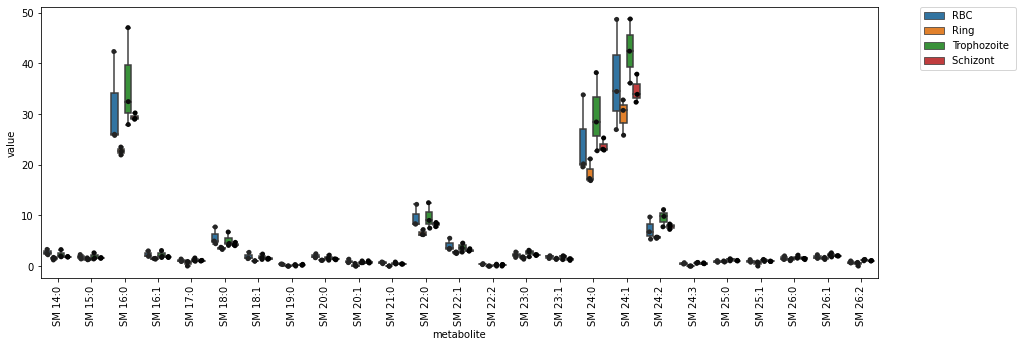

In [25]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    
    df2.columns = ['metabolite', 'Phase','value']
    
    tmp = []
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
        tmp.append(x[-1:])
    df2['experiment']= tmp
    
    _ = sns.boxplot(x="metabolite", y="value",
                    hue="Phase", data=df2)
   
    
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2, color='black', dodge=True)
    
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


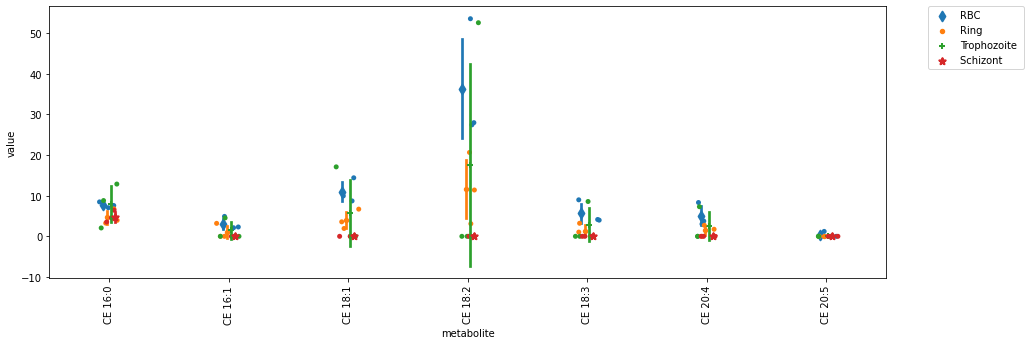

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


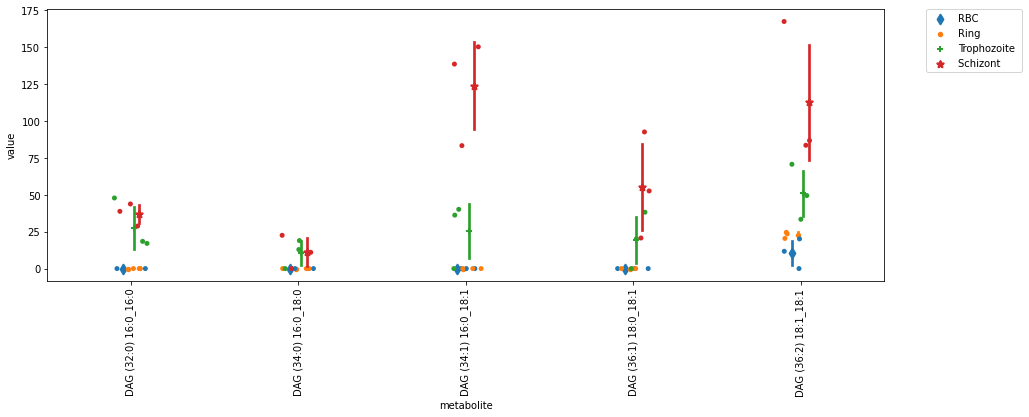

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


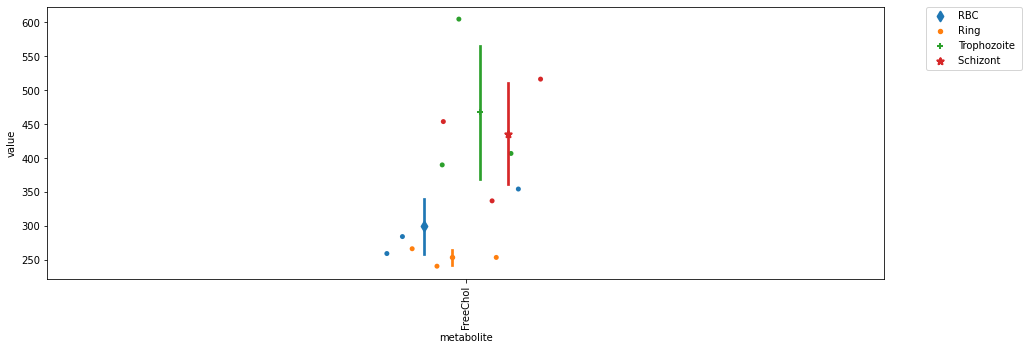

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


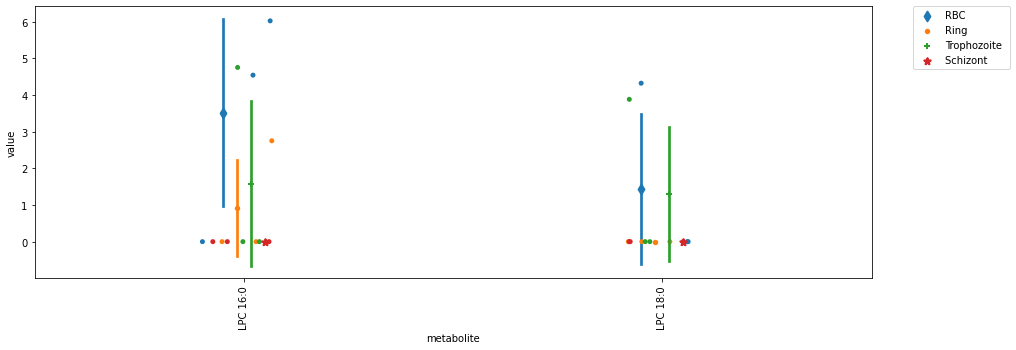

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


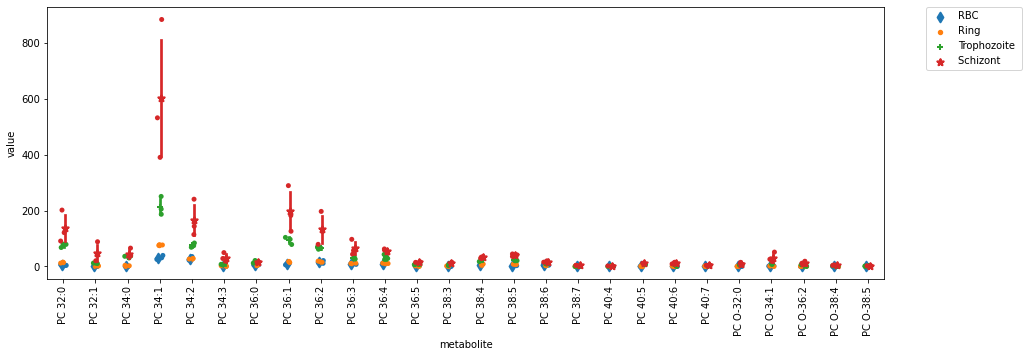

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


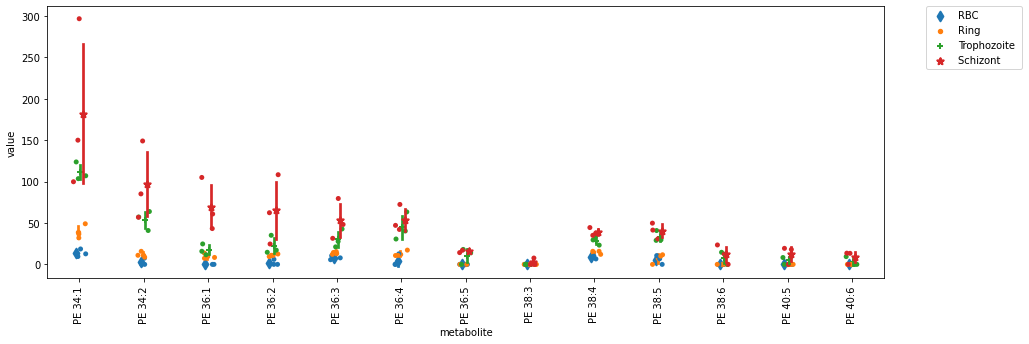

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


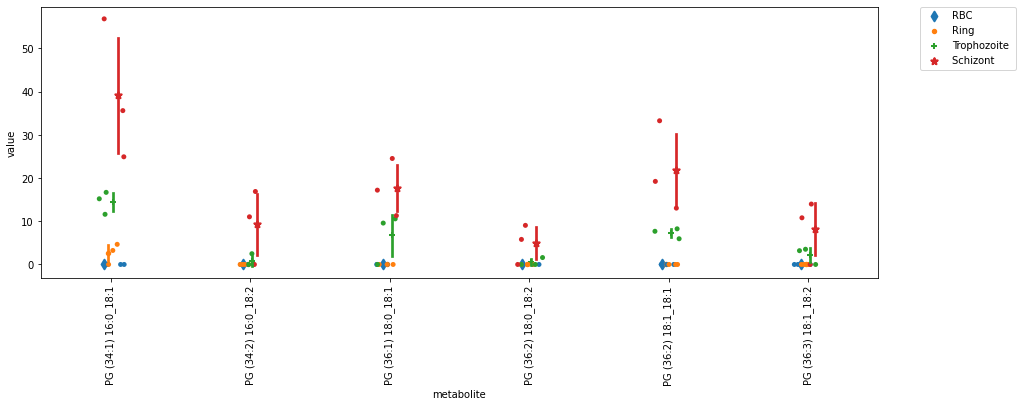

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


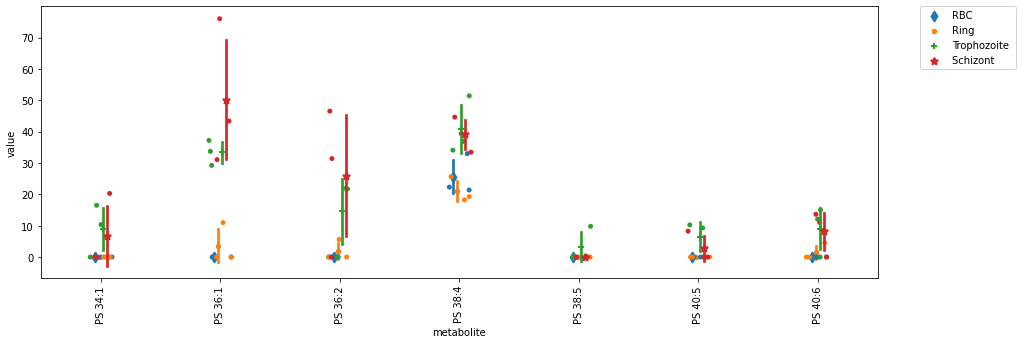

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


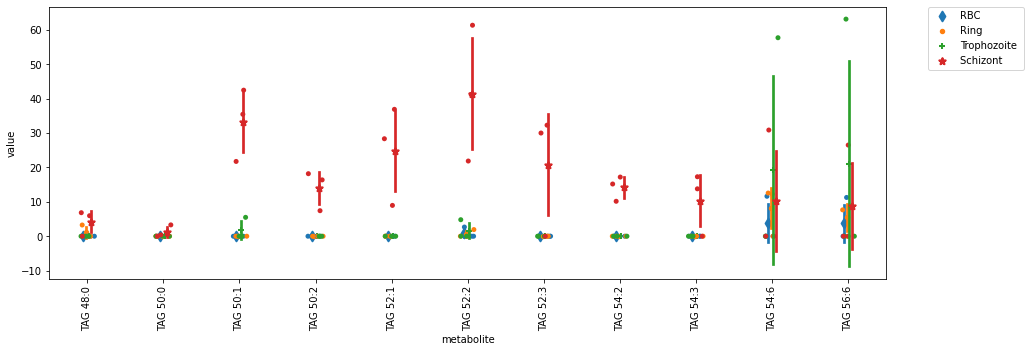

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


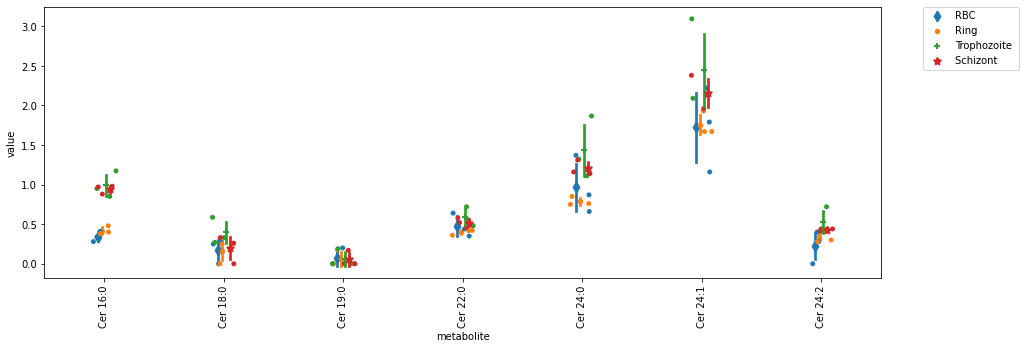

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


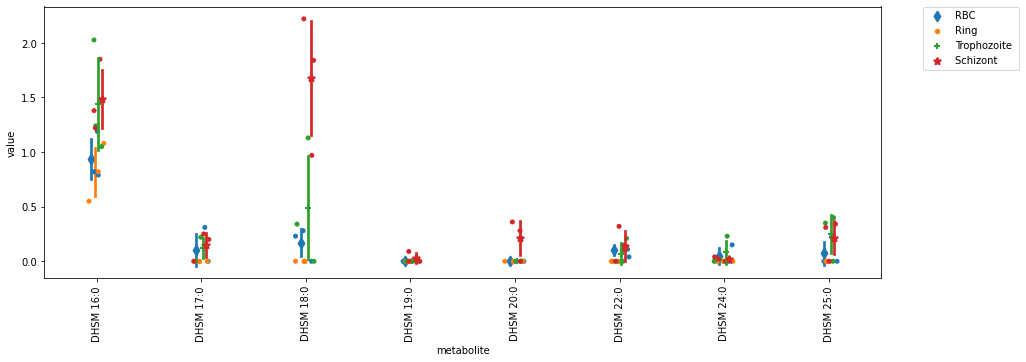

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


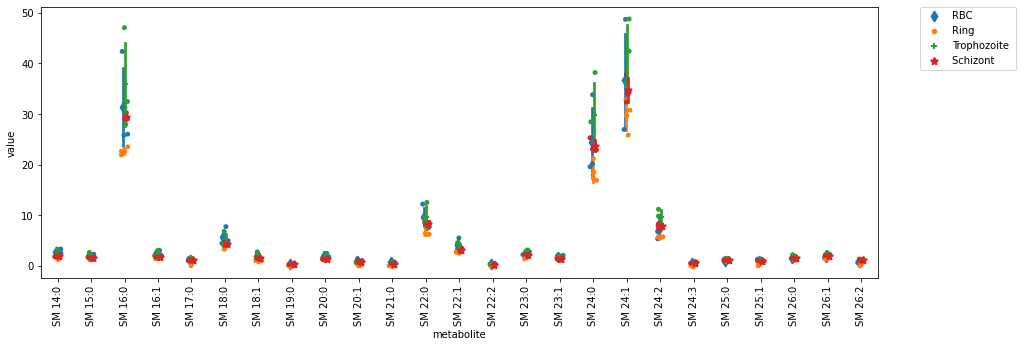

In [11]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    df2.columns = ['metabolite', 'Phase','value']
    
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
    
    _ = sns.pointplot(x="metabolite", y="value", hue="Phase", ci='sd',
                dodge=True, data=df2,
                linestyles=['','','',''],
               markers=['d','.','+','*'])
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2)
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

In [12]:
CE = df_alex.iloc[index_classes[0]:index_classes[1]]
means = CE.iloc[:,-8:]
df_means = means.iloc[:,::2].stack().reset_index()
df_means.columns = ['metabolite', 'variable','value']

tmp = means.iloc[:,1::2].stack().reset_index()
tmp.columns = ['metabolite', 'std','val']
means = pd.merge(df_means, tmp, on=tmp.index)


KeyError: RangeIndex(start=0, stop=21, step=1)

In [ ]:
df2 = CE.iloc[:,:-8].stack().reset_index()

df2.columns = ['metabolite', 'variable','value']
for i,x in enumerate(df2.variable):
    df2.variable.iloc[i]=x[:-1]

df2

In [ ]:

_ = sns.catplot(x="metabolite", y="value", hue="variable", ci='sd',
                dodge=0.4, data=df2, kind='point',
                linestyles=['','','',''],
               markers=['d','.','+','*'])


In [ ]:
# get each metabolite class in every phase
for i in range(4):
    print(CE.columns[i*3][:-1])
    data = CE.iloc[:,i*3:i*3+3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
        y = data[x]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0)
       
    plt.show()

In [ ]:
# to get each experiment
for i in range(3):
    data = CE.iloc[:,i::3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            plt.plot(x, y, 'r.', alpha=1.0)
    
    plt.show()
